In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# sns.set_theme(style="darkgrid")

In [21]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.stats.descriptivestats import describe

In [22]:
countries = os.listdir('../outputs/')

In [23]:
countries_labels = {
"Argentina": "AR",
"Australia": "AU",
"Brazil": "BR",
"Canada": "CN",
"China": "CH",
"France": "FR",
"Germany": "GE",
"India": "IN",
"Iran": "IR",
"Israel": "IS",
"Italy": "IT",
"Japan": "JP",
"Mexico": "MX",
"Portugal": "PT",
"Qatar": "QA",
"Russia": "RU",
"South Africa": "SA",
"Spain": "SP",
"US": "US",
"United Arab Emirates": "UA",
"United Kingdom": "UK"
}

In [24]:
countries = ["Brazil","France","India","Italy","Mexico","Russia","South Africa","US","United Kingdom"]

countries = ["Brazil","France","India","Italy","Germany","Russia","South Africa","US","United Kingdom", "Japan"]

In [25]:
def  mape(true, pred):
    merge = pd.concat([pd.Series(true.values), pd.DataFrame(pred.values)[0]], axis=1)
    merge.columns = pd.Index(['true','pred'])
    merge = merge.loc[merge[merge.columns[0]] != 0]
    return mean_absolute_percentage_error(merge[merge.columns[0]], merge[merge.columns[1]])

In [26]:
data = {}
for country in countries:
    data[country] = {}
    path = '../outputs/'+country+'/data/'
    for split in ['train_data', 'val_data', 'test_data']:
        tmp = pd.read_csv(path+'/'+split+'.csv', index_col=0)        
        data[country][split] = tmp


In [27]:
df_data = pd.DataFrame()
for country in countries:
    path = '../outputs/'+country+'/data/'
    for k, split in enumerate(['train_data', 'val_data', 'test_data']):
        tmp = pd.read_csv(path+'/'+split+'.csv', index_col=0)
        tmp = tmp.rename({country:'cases'}, axis=1)
        tmp['split'] = str(k)+split
        tmp['country'] = country
        df_data = df_data.append(tmp)

/tmp/ipykernel_16094/2461384419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(tmp)
/tmp/ipykernel_16094/2461384419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(tmp)
/tmp/ipykernel_16094/2461384419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(tmp)
/tmp/ipykernel_16094/2461384419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_data.append(tmp)
/tmp/ipykernel_16094/2461384419.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_da

In [28]:
predictions = {}
for country in countries:
    predictions[country] = {}
    path = '../outputs/'+country+'/preds/'
    models = os.listdir(path)
    #print(models)
    for model in models:
        try:
            #print(path+model+'/'+model+'_test.csv')
            tmp = pd.read_csv(path+model+'/'+model+'_test.csv', index_col=0)
            predictions[country][model] = tmp
        except:
            pass


In [29]:
selections = {}
for country in countries:
    selections[country] = {}
    path = '../outputs/'+country+'/preds/'
    models = os.listdir(path)
    for model in models:
        if (model == 'ASDS' or model == 'AEDS'):
            tmp = pd.read_csv(path+model+'/selection.csv', index_col=0)
        elif (model == 'AEDS4'):
            tmp = pd.read_csv(path+model+'/selection.csv', index_col=0).applymap(lambda x: x[1] if len(x) == 3 else x[1:3])
        elif(model == 'ASO'):
            tmp = pd.read_csv(path+model+'/best.csv', index_col=0)
        elif(model == 'AEO'):
            tmp = pd.read_csv(path+model+'/oracle.csv', index_col=0)
        selections[country][model] = tmp

In [30]:
#selected_countries = ['Brazil', 'US', 'United Kingdom', 'South Africa', 'India', 'Japan']
# selected_countries = ["Brazil","France","India","Italy","Mexico","Russia","South Africa","US","United Kingdom"]
selected_countries = ["Brazil","France","India","Italy","Germany","Russia","South Africa","US","United Kingdom", "Japan"]
# selected_countries = ['Brazil', 'US', 'Mexico', 'United Kingdom', 'France', 'Italy', 'Russia', 'South Africa', 'India', 'Israel']
#selected_countries = ['Brazil', 'US', 'Mexico', 'United Kingdom', 'France', 'Germany', 'Russia', 'South Africa', 'India', 'Iran', 'Israel', 'Japan']

# EDA

In [31]:
data['Russia']['train_data'].describe()

Russia
count    496.000000
mean   10098.088710
std     7839.532976
min        0.000000
25%     5185.750000
50%     8558.500000
75%    13759.500000
max    28510.000000

In [32]:
def desc(x):
    return describe(x, stats=['nobs', 'mean', 'std', 'coef_var', 'min', 'max','percentiles', 'skew', 'kurtosis', 'ci'], percentiles=['25', '50', '75'])

In [33]:
df_data.pivot_table(index='split', columns='country', values='cases', aggfunc=['count','mean', 'std','min','max']).swaplevel(1,0,axis=1).T

split                   0train_data      1val_data     2test_data
country                                                          
Brazil         count     496.000000     142.000000      71.000000
France         count     496.000000     142.000000      71.000000
Germany        count     496.000000     142.000000      71.000000
India          count     496.000000     142.000000      71.000000
Italy          count     496.000000     142.000000      71.000000
Japan          count     496.000000     142.000000      71.000000
Russia         count     496.000000     142.000000      71.000000
South Africa   count     496.000000     142.000000      71.000000
US             count     496.000000     142.000000      71.000000
United Kingdom count     496.000000     142.000000      71.000000
Brazil         mean    33361.673387   36120.471831    8279.690141
France         mean    11451.778226    9272.464789   39852.859155
Germany        mean     7334.971774    5073.978873   38488.929577
India          mean    56452.445565   41918.352113   10117.507042
Italy          mean     8450.381048    3577.929577   19662.042254
Japan          mean     1492.885081    6850.887324     178.028169
Russia         mean    10098.088710   20820.056338   32606.042254
South Africa   mean     3324.258065    8818.514085    7604.507042
US             mean    66428.792339   83911.647887  133320.915493
United Kingdom mean     8976.381048   28890.126761   60516.408451
Brazil         std     25122.591026   25591.875202    4185.152029
France         std     13750.349749    8978.431733   48035.630213
Germany        std      8084.596434    4341.705812   19110.586157
India          std     86749.745931   23135.409045    3662.973148
Italy          std      9352.215193    2111.089106   25882.191844
Japan          std      1760.880687    7413.304762      87.072215
Russia         std      7839.532976    5069.986589    5456.718717
South Africa   std      4183.663850    6150.450062    8948.362329
US             std     62633.392015   69334.603455  116584.675432
United Kingdom std     12575.011972   11556.765623   37392.620531
Brazil         min         0.000000    6185.000000    1458.000000
France         min         0.000000     -28.000000    1283.000000
Germany        min         0.000000     212.000000    6573.000000
India          min         0.000000   13058.000000       0.000000
Italy          min         0.000000     266.000000    2535.000000
Japan          min         0.000000     230.000000      44.000000
Russia         min         0.000000    8702.000000   20482.000000
South Africa   min         0.000000       0.000000     106.000000
US             min         0.000000    4285.000000   19166.000000
United Kingdom min         0.000000    3099.000000   29843.000000
Brazil         max     88555.000000  124878.000000   17124.000000
France         max     72017.000000   34151.000000  232200.000000
Germany        max     29875.000000   17015.000000   76414.000000
India          max    392488.000000  134154.000000   22775.000000
Italy          max     37239.000000    7823.000000  144255.000000
Japan          max      7051.000000   25992.000000     432.000000
Russia         max     28510.000000   33434.000000   40210.000000
South Africa   max     18503.000000   26485.000000   37875.000000
US             max    259761.000000  251894.000000  590666.000000
United Kingdom max     57724.000000   53969.000000  189836.000000

In [34]:
df_describe_all = df_data.groupby(['country']).describe()
df_describe_all.drop([('cases', 'count'),('cases', 'min')], axis=1, inplace=True)
#df_describe_all[('cases','cv')] = df_data.groupby(['country']).std() / df_data.groupby(['country']).mean()
df_describe_all[('cases','sum')] = df_data.groupby(['country']).sum()
df_describe_all.style.format('{:,.0f}').to_latex('describe',  caption='Dataset Statistics', hrules=True, label='describe', position='H', position_float="centering")

In [35]:
df_describe_splits = df_data.pivot_table(index='country', columns='split', values='cases', aggfunc=['mean', 'std', 'sum']).swaplevel(1,0,axis=1).sort_index(axis=1, level=0, sort_remaining=False)
#df_describe_splits = df_describe_splits.style.format(thousands=',', precision='2')
cols = df_describe_splits. columns
for i, col in enumerate(cols):
    if col[1] == 'skew':
        df_describe_splits[col] = df_describe_splits[col].apply(lambda x: '{:.2f}'.format(x))
        
    else: 
        df_describe_splits[col] = df_describe_splits[col].apply(lambda x: '{:,.0f}'.format(x))
df_describe_splits.style.to_latex('describe_splits',  caption='Split Statistics', hrules=True, label='describe splits', position='H', position_float="centering")

In [36]:
df_describe_splits

split          0train_data                     1val_data                      \
                      mean     std         sum      mean     std         sum   
country                                                                        
Brazil              33,362  25,123  16,547,390    36,120  25,592   5,129,107   
France              11,452  13,750   5,680,082     9,272   8,978   1,316,690   
Germany              7,335   8,085   3,638,146     5,074   4,342     720,505   
India               56,452  86,750  28,000,413    41,918  23,135   5,952,406   
Italy                8,450   9,352   4,191,389     3,578   2,111     508,066   
Japan                1,493   1,761     740,471     6,851   7,413     972,826   
Russia              10,098   7,840   5,008,652    20,820   5,070   2,956,448   
South Africa         3,324   4,184   1,648,832     8,819   6,150   1,252,229   
US                  66,429  62,633  32,948,681    83,912  69,335  11,915,454   
United Kingdom       8,976  12,575   4,452,285    28,890  11,557   4,102,398   

split          2test_data                      
                     mean      std        sum  
country                                        
Brazil              8,280    4,185    587,858  
France             39,853   48,036  2,829,553  
Germany            38,489   19,111  2,732,714  
India              10,118    3,663    718,343  
Italy              19,662   25,882  1,396,005  
Japan                 178       87     12,640  
Russia             32,606    5,457  2,315,029  
South Africa        7,605    8,948    539,920  
US                133,321  116,585  9,465,785  
United Kingdom     60,516   37,393  4,296,665

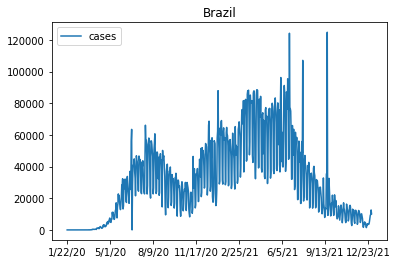

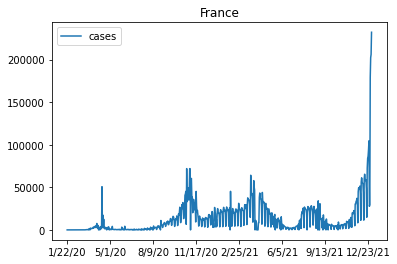

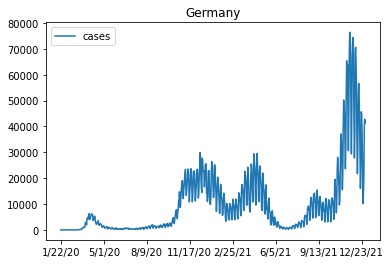

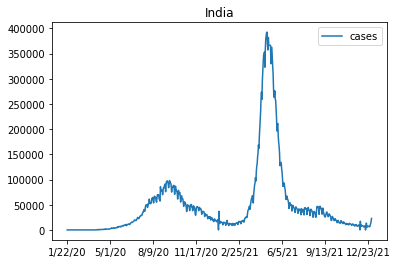

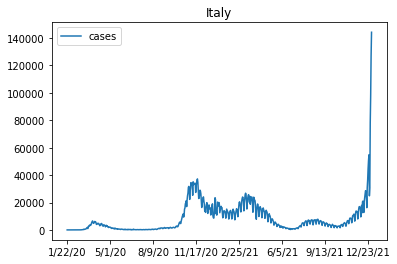

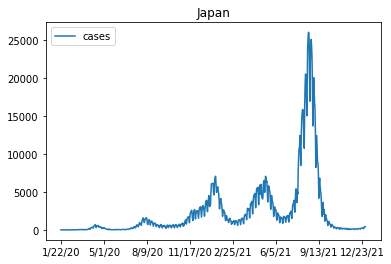

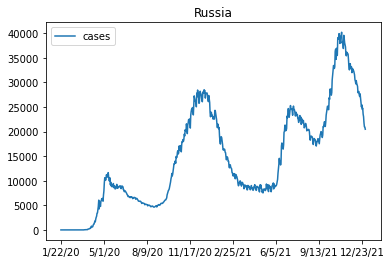

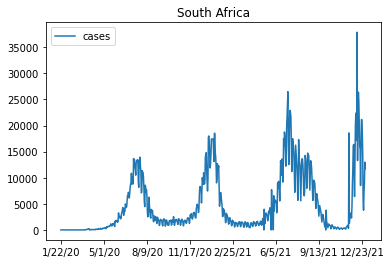

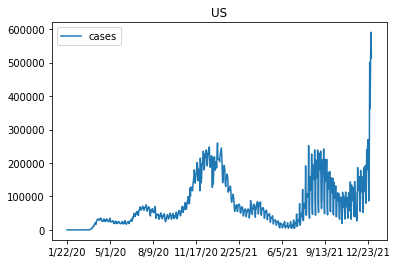

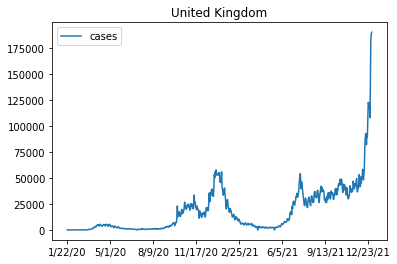

In [37]:
for g in df_data.groupby('country'):
    try:
        selected_countries.index(g[0])
        g[1].plot(title=g[0])
    except:
        pass

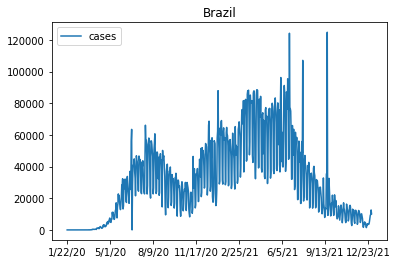

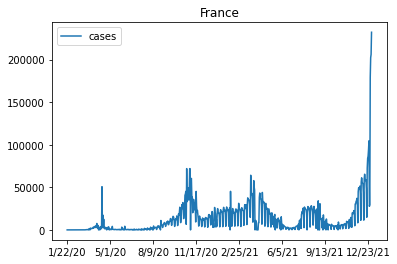

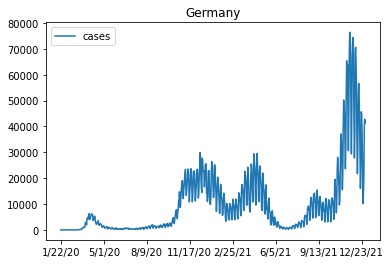

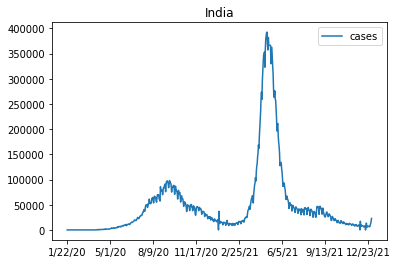

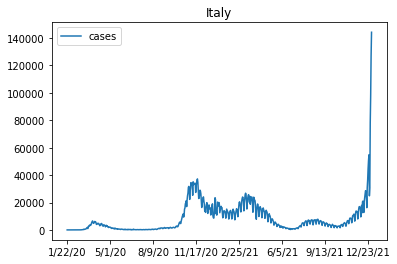

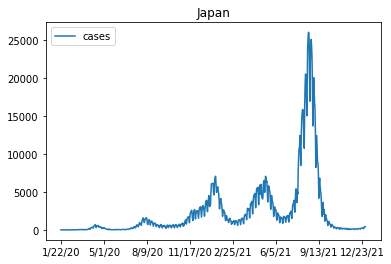

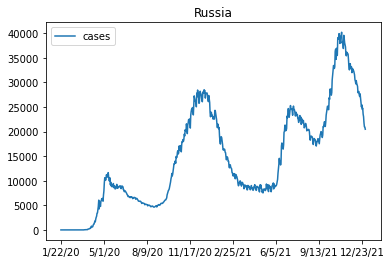

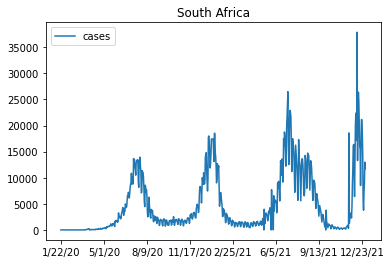

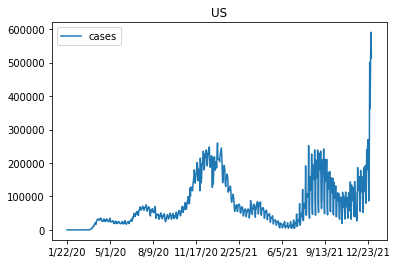

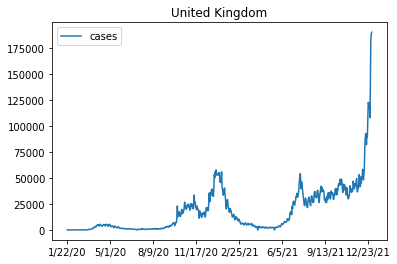

In [38]:
for g in df_data.groupby('country'):
    g[1].plot(title=g[0])

## Drifts

In [39]:
drifts = {}
for country in countries:
    path = '../outputs/'+country+'/data/'
    drifts[country] = pd.read_csv(path+'/drifts.csv', index_col=0)

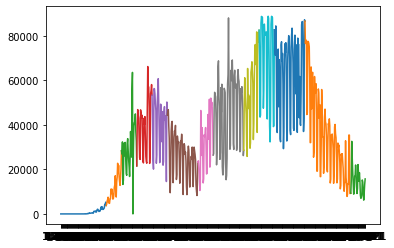

In [40]:
for country, values in drifts.items():
    fig, ax = plt.subplots()
    fig.patch.set_alpha(0)
    for drift in values.groupby('drift'):
        ax.plot(drift[1][country])
    break

In [41]:
df_describe = df_data.groupby(['country', 'split']).describe().reset_index().pivot(index='country', columns='split').swaplevel(0,2,axis=1).sort_index(axis=1, level=0, sort_remaining=False).droplevel(2, axis=1).style.format('{:,.1f}')
df_describe

# Training

In [42]:
runs = {
     'Brazil': ["4141cd888542468cbf90629e8572aace","a8a5526be8334072a682c029188ed76d","431cf00598d54a4aa261a50fbe4738da","bf776f3dcd0541959d1b1a7d595f8f5f","566c678e231a47478289ee351828d0c9","a61a55aeb6e04f24baf2dba735006649","5cc5d708721e487a8631270c22155d7a","81747adf34444fdf879f29b4114a5ce1","d90c49b588db41db82f47d897a126359"],
     'US': ["b304a13525eb4a9cb5130a1e1d9f5cae","078fda21d46f4a5d80e1ff48268b5f59","bbbd672076034a1b818a27fdbad22255","4135ec342f5f4636b79a3ed6ba2db6b8","6470bfa0279347f6867f7952ee9b3b40","966bbbe3caa44bae9c608c4b861758da","c11df088b1ff4d80a044fa509257d4d0","38789dcc840f46f8bb39c44929a7adf2","b80eb078c6ba434b9fc435d84e205f43","8489c66e3e5e40e4b38217d431254103"],
     'United Kingdom': ["11aa5f9a576c4933a8e15cd9a3ee3bd2","e1783656fe574080acfc69015f1ea157","bb72bc782717486b9ed301d43436d50d","233bab31d06b4299b980c2cde0a7e742","69f1a0fef75f46e183d6e4e8dcdcb636","0705375ed540445ba82303c5c1588e1d","17a8f12a2ca84c1dab4bc4a063005cd9","c66a538b197a4a1f85fc8ebeabb0f46a","99b183b23e18468eacdad618048cf36b","aa006dcfcb334be0a6a8110be4f7b8c2","837e480a7972439fb974a4021afa3efd","85aa19b6df47493a8e98e59cfd4da6a0"],
     'South Africa': ["d996fee809514db9b5a3d33d63d20bdf","634d5cb1e56242a6a544fc01bd0bd7d6","1b321af4e87b4057b1c13708572a4d59","89fc9d64ca714521abde18140a3140ce","bc6b32efc358481dbdb46809762c7cf6","c95db7c86dc34a54927d0685ea3415ba","244cd86b37ed48a786b7a0b15ac18f37","94aed45b689649428e57a9721dee299e","572f412477ff422b890ed09c406d7dc8","c0782ccbe91643f88349c1e1e13390f6"],
     'India': ["f198855931334fdb985db4ec5422d255","cf90a37dbbba4dc89227291386a437cb","c7eb51f756504989bcead7417c48ec4b","55c789a093964827bd4da117aac98124","a329c04f966e400d96e31e3b2500edd2","385175cf52a74520904d28b53cefbf52","06f4d4f40c0c438182f39d6e396b4086","e1aa4065a09b4a7aa6245c9e141bdb60","ffc4fc34ee8c4cb186ee52cb6540ba56","f7eb44a923e64ec09d93bab76d07db9c","c58966231fd14fd4b8a2129b4c7e0ee3","da9ee21206624a96ab241320e65f9d6f","e0b3e7885ae44c7eb9b87186be51aadf"],
     'Japan': ["34f9b7c2eadb449881fe5e8d79a4d8e6","8df16a21c670494eaa02fee564775dff","4fe47d00e334470db9b39294ca83883e","d64e307e181a4389b9016856181c7c0f","c63bf99f81b34cbbba82b41f5aa82182","b6e3a6998947404fb89350517abda9f1","e3c874a844954de18c232bc430d6ab9e","18d0422f288f495e81b1b16cdd12c944","2c941a7d1c7444e69ebf29f58191dc69","bb7d567d2f0e4ea89145440ad361d160","bbc4441274fd4fa1ad160cc4e74fb658"]
}

In [43]:
params = {}
for k,v in runs.items():
    params[k] = {}
    for i, model in enumerate(v):
        model
        run_path = '../mlruns/8/'+model+'/params/'
        order = open(run_path+'order','r').read()
        seasonal_order = open(run_path+'seasonal_order','r').read()
        params[k][i] = (order, seasonal_order)
        #print(order)
#mlruns/8/4141cd888542468cbf90629e8572aace/params/order

In [44]:
pd.DataFrame(params).fillna('-').style.to_latex('params_AS',  caption='Sarimas Orders', hrules=True, label='params_as', position='h', position_float="centering")

# Forecasting

## AS

<AxesSubplot:>

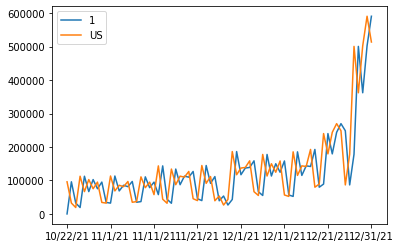

In [45]:
fig, ax = plt.subplots()
pd.DataFrame(predictions['US']['AS']['1']).plot(ax=ax)
data['US']['test_data'].plot(ax=ax)

<AxesSubplot:>

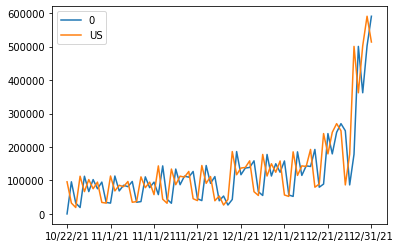

In [46]:
fig, ax = plt.subplots()
pd.DataFrame(predictions['US']['AS']['0']).plot(ax=ax)
data['US']['test_data'].plot(ax=ax)

In [47]:
mean_squared_error(data['US']['test_data'], predictions['US']['AS']['0'], squared=False)

78618.38640439643

In [48]:
mean_squared_error(data['US']['test_data'], predictions['US']['AS']['1'], squared=False)

78618.38640439643

In [49]:
mse_dict = {}
mse_dict2 = {}
mse_dict3 = {}
for country in selected_countries:
    df = pd.DataFrame(predictions[country]['AS'])
    df2 = pd.DataFrame(predictions[country]['ASDS'])
    df3 = pd.DataFrame(predictions[country]['ASO'])
    #fig, axs = plt.subplots(1,df.shape[-1],figsize=(30,6))
    test = data[country]['test_data'][country].reset_index(drop=True)
    mse_dict[country] = {}
    mse_dict2[country] = {}
    mse_dict3[country] = {}
    for col in df.columns:
        k = int(col)        
        #print(df[col].shape)
        #print(test.shape)
        #axs[k].plot(df[col],label=col)
        #axs[k].set_xticklabels([])
        #axs[k].plot(test, label='test')
        #mse = mean_squared_error(test.iloc[6:], df[col].iloc[6:], squared=False)
        mse = mape(test.iloc[6:], df[col].iloc[6:])
        #mse = mean_absolute_percentage_error(test, df[col])
        #print(pred[0], k, mse)
        #axs[k].annotate('RMSE: '+ '{:,.0f}'.format(mse), xy=(0, -13),  xycoords='axes points', xytext=(0,-13), textcoords='offset points')
        #axs[k].annotate('MAPE: '+ '{:,.2f}'.format(mse*100), xy=(0, -13),  xycoords='axes points', xytext=(0,-13), textcoords='offset points')
        #axs[k].set_title(country+'_'+col)
        #axs[k].legend()
        mse_dict[country][k] = mse        
        #df[col].plot(ax=ax, label='AS')
        #data[country]['test_data'][country][6:].reset_index(drop=True).plot(ax=ax, label='TEST')
        #plt.legend()
    mse = mape(test.iloc[6:], df2)
    mse_dict2[country]['ASDS'] = mse
    mse = mape(test.iloc[6:], df3.iloc[5:])
    mse_dict3[country]['ASO'] = mse
    #axs[0].annotate('LOWEST ERROR (MODEL): '+ '{:,.0f} ({})'.format(np.array(mse_list).min(), np.array(mse_list).argmin()), xy=(0, -20),  xycoords='axes points', xytext=(0,-20), textcoords='offset points') 
    # fig, ax = plt.subplots(figsize=(8,6))
    # predictions[country]['AS']['0'].plot(ax=ax, label='AS')
    # plt.legend()
    # plt.title(country)

In [50]:
mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))
#mse_df = mse_df.append(mse_df.idxmin(axis=0).T, ignore_index=True)
mse_df = mse_df.applymap(lambda x: '{:.3f}'.format(x))
mse_df = mse_df.rename(countries_labels, axis=1)
#mse_df = mse_df.rename({len(mse_df)-1: 'Lowest Error Model'})
mse_df = mse_df.replace({'nan':'1'})

mse_df.style.to_latex('mse_AS',  caption='Pool Errors', hrules=True, label='error_as', position='h', position_float="centering")
mse_df.drop('ASO').style.highlight_min(axis=0,
                           props='bfseries: ;').to_latex('mse_AS_hl',  caption='Pool Errors', hrules=True, label='error_as', position='h', position_float="centering")




/tmp/ipykernel_16094/4280467685.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))
/tmp/ipykernel_16094/4280467685.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))


# Selection

### ASDS

In [51]:
corrs = {}
for country in selected_countries:
    corrs[country] = selections[country]['ASDS']['0'].corr(selections[country]['ASO']['0'][5:].reset_index(drop=True))
corrs = pd.DataFrame.from_dict(corrs,'index').round(2).rename({0:'Correlation'}, axis=1)

In [54]:
pd.DataFrame(corrs).style.format('{:.2f}')

In [57]:
pd.DataFrame(corrs).style.format('{:.2f}').to_latex('oracle_correlation_ASDS',  caption='ASDS x ASO', hrules=True, label='corr_asds', position='h', position_float="centering")

In [58]:
ranks = {}
for country in countries:
    ranks[country] = {}
    #print(models)
    for model in ['AS', 'AE4']:
        #print(len(predictions[country][model]))
        #print(len(data[country]['test_data']))
        if(model == 'AS'):
            ranks[country][model] = pd.DataFrame(np.subtract(predictions[country][model].values,data[country]['test_data'].values)).abs().rank(axis=1)    
        else:
            ranks[country][model] = pd.DataFrame(np.subtract(predictions[country][model].values,data[country]['test_data'].iloc[1:].values)).abs().rank(axis=1)    
        


In [59]:
ranks

{'Brazil': {'AS':       0     1     2     3     4     5     6     7     8     9    10    11  \
  0    7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0  7.0   7.0   
  1    3.0   2.0  12.0   8.0   5.0   4.0  11.0   6.0  10.0  13.0  1.0   9.0   
  2   12.0  13.0   5.0  11.0   3.0   9.0   8.0   6.0   7.0   1.0  2.0   4.0   
  3    1.0  11.0   2.0   7.0  10.0  12.0   9.0   3.0   5.0  13.0  6.0   4.0   
  4    8.0  10.0   3.0  12.0   2.0   6.0   9.0  11.0   4.0   5.0  1.0   7.0   
  ..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
  66  11.0   7.0  10.0   5.0   1.0   4.0  13.0   9.0   8.0   3.0  2.0  12.0   
  67   8.0   5.0  13.0   4.0   2.0   6.0  11.0  12.0  10.0   7.0  1.0   9.0   
  68   6.0   1.0  13.0   3.0   9.0  10.0   5.0  12.0  11.0   8.0  4.0   7.0   
  69   7.0   2.0  13.0   3.0  11.0  10.0   1.0  12.0   9.0   5.0  6.0   8.0   
  70   3.0  12.0  13.0   7.0   9.0   6.0   4.0  10.0   1.0  11.0  2.0   8.0   
  
        12  
  0    7.0  
  1    

In [60]:
selections['Brazil']['AEDS4'].shift(2)

0
0   NaN
1   NaN
2     1
3     1
4     5
..  ...
58    6
59    6
60    6
61    6
62    6

[63 rows x 1 columns]

In [61]:
pd.concat([selections['Brazil']['ASDS'].reset_index(drop=True), selections['Brazil']['AEDS4'].shift(2)], axis=1)

0    0
0   10  NaN
1   10  NaN
2   10    1
3   10    1
4   10    5
..  ..  ...
60   8    6
61   3    6
62   3    6
63   3  NaN
64   3  NaN

[65 rows x 2 columns]

In [62]:
selections['Brazil']['ASDS'].tail(65)

0
2021-10-28  10
2021-10-29  10
2021-10-30  10
2021-10-31  10
2021-11-01  10
...         ..
2021-12-27   8
2021-12-28   3
2021-12-29   3
2021-12-30   3
2021-12-31   3

[65 rows x 1 columns]

In [67]:
pd.DataFrame(selections['Brazil']['ASDS'][-65:])

0
2021-10-28  10
2021-10-29  10
2021-10-30  10
2021-10-31  10
2021-11-01  10
...         ..
2021-12-27   8
2021-12-28   3
2021-12-29   3
2021-12-30   3
2021-12-31   3

[65 rows x 1 columns]

In [68]:
pd.DataFrame(selections['Brazil']['ASO'][-65:])


0
5    8
6    1
7   12
8    7
9    1
..  ..
65   4
66  10
67   1
68   6
69   8

[65 rows x 1 columns]

In [69]:
pd.DataFrame(ranks['Brazil']['AS'][-65:])

0     1     2     3     4     5     6     7     8     9     10    11  \
6   10.0  11.0   9.0  12.0   7.0   8.0   4.0   6.0   1.0   2.0   3.0   5.0   
7    7.0   1.0   6.0   4.0  12.0   9.0   2.0   8.0   3.0  13.0  10.0  11.0   
8    5.0  12.0   7.0   2.0   3.0   6.0  10.0   4.0  11.0  13.0   8.0   9.0   
9    4.0   5.0  12.0   3.0   7.0   9.0  11.0   1.0  10.0  13.0   6.0   8.0   
10   2.0   1.0  13.0   4.0  10.0   5.0  12.0   9.0   8.0   3.0   7.0  11.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
66  11.0   7.0  10.0   5.0   1.0   4.0  13.0   9.0   8.0   3.0   2.0  12.0   
67   8.0   5.0  13.0   4.0   2.0   6.0  11.0  12.0  10.0   7.0   1.0   9.0   
68   6.0   1.0  13.0   3.0   9.0  10.0   5.0  12.0  11.0   8.0   4.0   7.0   
69   7.0   2.0  13.0   3.0  11.0  10.0   1.0  12.0   9.0   5.0   6.0   8.0   
70   3.0  12.0  13.0   7.0   9.0   6.0   4.0  10.0   1.0  11.0   2.0   8.0   

      12  
6   13.0  
7    5.0  
8    1.0  
9    2.0  
10   6.0  
..   ...  
66   6.0  
67   3.0  
68   2.0  
69   4.0  
70   5.0  

[65 rows x 13 columns]

In [63]:
selection_rank = {}
selection_rank_ae = {}
for country in countries:
    selection_rank[country] = {}
    selection_rank_ae[country] = {}
    for model in [('AS', 'ASDS')]:
        #print(len(ranks[country][model[0]]))
        #print(len(selections[country][model[1]]))
        if(model[0] == 'AS'):
            selection_rank[country] = {}
            for k, v in enumerate(ranks[country]['AS'][-65:].values):
                print(k, v)
                col = selections[country]['ASDS'].iloc[k].values[0]
                print(col)
                selection_rank[country][k] = v[col]
                print(v[col])
        else:
            #selection_rank[country]['AEDS4'] = {}
            for k, v in enumerate(ranks[country]['AE4'][-63:].values):
                col = selections[country]['AEDS4'].iloc[k].values[0]
                print(v)
                print(col)
                print(v[int(col)])
                selection_rank_ae[country][k] = v[int(col)]

0 [10. 11.  9. 12.  7.  8.  4.  6.  1.  2.  3.  5. 13.]
10
3.0
1 [ 7.  1.  6.  4. 12.  9.  2.  8.  3. 13. 10. 11.  5.]
10
10.0
2 [ 5. 12.  7.  2.  3.  6. 10.  4. 11. 13.  8.  9.  1.]
10
8.0
3 [ 4.  5. 12.  3.  7.  9. 11.  1. 10. 13.  6.  8.  2.]
10
6.0
4 [ 2.  1. 13.  4. 10.  5. 12.  9.  8.  3.  7. 11.  6.]
10
7.0
5 [ 7.  1. 12.  4. 10.  8. 11.  5.  2. 13.  6.  9.  3.]
7
5.0
6 [ 3. 13.  7. 12.  5.  8.  4.  6. 11.  1.  9.  2. 10.]
7
6.0
7 [11. 10.  9. 12.  1.  3.  4.  7.  2.  8.  6.  5. 13.]
0
11.0
8 [ 1.  8. 10.  4. 11.  2.  7.  3.  6. 13. 12.  9.  5.]
0
1.0
9 [ 3.  1.  2.  8.  4. 12.  9. 10.  5. 13.  6. 11.  7.]
0
3.0
10 [ 4.  8. 12.  2. 10.  9.  6.  3. 11. 13.  7.  5.  1.]
0
4.0
11 [12.  9. 11.  1.  6. 10.  5.  7.  4. 13.  3.  8.  2.]
11
8.0
12 [13. 10.  2. 12.  3.  6.  4.  9.  8.  1.  5.  7. 11.]
11
7.0
13 [12.  6. 11.  5.  8.  1.  3.  7. 10.  2.  9. 13.  4.]
6
3.0
14 [13.  8. 12.  5. 11.  4.  2.  1.  7. 10.  9.  3.  6.]
6
2.0
15 [ 1.  4. 12.  6. 13.  2.  9.  8.  7.  3. 10. 11.  5.]

In [64]:
selections['Brazil']['ASDS'].reset_index(drop=True)

0
0   10
1   10
2   10
3   10
4   10
..  ..
60   8
61   3
62   3
63   3
64   3

[65 rows x 1 columns]

In [65]:
comp = pd.concat([selections['US']['ASO'],selections['US']['ASDS'].reset_index(drop=True)], axis=1)


In [66]:
comp.iloc[:,0][-65:] == comp.iloc[:,1][-65:]

5     False
6     False
7      True
8     False
9     False
      ...  
65    False
66    False
67    False
68    False
69    False
Name: 0, Length: 65, dtype: bool

In [ ]:
selections['US']['ASO']

0
0    4
1    9
2   11
3    4
4    5
..  ..
65   1
66   1
67   1
68   1
69   1

[70 rows x 1 columns]

In [ ]:
comp[-65:]

0   0
6    6.0  10
7    7.0   6
8    6.0   7
9   13.0   6
10   4.0  13
..   ...  ..
66   1.0   1
67   1.0   1
68   1.0   1
69   1.0   1
70   NaN   1

[65 rows x 2 columns]

In [ ]:
ranks['US']['AS']

0     1    2     3     4     5     6     7     8     9     10    11  \
0    7.5   7.5  7.5   7.5   7.5   7.5   7.5   7.5   7.5   7.5   7.5   7.5   
1   10.0  12.0  6.0  12.0   1.0   7.0  14.0  12.0   8.0   9.0   4.0   2.0   
2    6.0   2.0  7.0   1.0  14.0  13.0   4.0   3.0  10.0   5.0  11.0   8.0   
3   10.0  12.5  3.0  11.0   7.0   9.0  14.0  12.5   8.0   6.0   4.0   1.0   
4   10.0  12.0  5.0  12.0   1.0   8.0  14.0  12.0   9.0   4.0   2.0   7.0   
..   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
66   5.0   1.0  6.0   4.0   7.0  11.0   2.0  14.0  13.0   3.0  12.0   9.0   
67   2.0   1.0  8.0   5.0  11.0   7.0   3.0   9.0   4.0   6.0  12.0  14.0   
68   4.0   1.0  8.0   3.0  10.0   5.0   2.0   6.0   7.0  11.0  12.0  14.0   
69   5.0   1.0  7.0   2.0  11.0   9.0   3.0   6.0   8.0   4.0  12.0  14.0   
70   5.0   1.0  7.0   8.0  10.0   2.0   3.0   4.0   6.0  11.0  12.0  14.0   

      12    13  
0    7.5   7.5  
1    5.0   3.0  
2   12.0   9.0  
3    5.0   2.0  
4    3.0   6.0  
..   ...   ...  
66  10.0   8.0  
67  10.0  13.0  
68   9.0  13.0  
69  10.0  13.0  
70   9.0  13.0  

[71 rows x 14 columns]

In [67]:
# selection_rank_df = pd.DataFrame(selection_rank)
selection_rank_df = pd.DataFrame.from_dict(selection_rank)
selection_rate = {}
for col in selection_rank_df.columns:
    selection_rate[col] = selection_rank_df[col].value_counts()

In [ ]:
# selection_rank_df = pd.DataFrame(selection_rank_ae)
# selection_rate = {}
# for col in selection_rank_df.columns:
#     selection_rate[col] = selection_rank_df[col].value_counts()

In [70]:
#TOTAL = 65
TOTAL = len(selection_rank_df)

In [71]:
selection_rank_df

Brazil  France  India  Italy  Germany  Russia  South Africa    US  \
0      3.0     8.0    6.0    1.0     10.0     7.0           2.0   2.0   
1     10.0     7.0   10.0   11.0      1.0    12.0           3.0   9.0   
2      8.0     4.0   11.0    2.0      2.0    15.0           1.0   3.0   
3      6.0     6.0   10.0    1.0      7.0     1.0           3.0  11.0   
4      7.0     6.0   16.0    3.0      5.0    12.0          10.0   2.0   
..     ...     ...    ...    ...      ...     ...           ...   ...   
60     8.0     4.0   11.0    4.0      7.0    14.0           8.0   4.0   
61     4.0     1.0    3.0    1.0      3.0     2.0           1.0   2.0   
62     3.0     1.5    5.5    1.0      1.0    13.0           2.0   7.0   
63     3.0     1.5    7.5    5.0      7.0     8.0           2.0  10.0   
64     7.0     1.5    7.5    5.0      2.0    13.0          13.0   3.0   

    United Kingdom  Japan  
0             11.0    7.0  
1             12.0   10.0  
2             11.0    2.0  
3              5.0    9.0  
4              3.0    1.0  
..             ...    ...  
60             4.0   12.0  
61             2.0    7.0  
62             2.0    2.0  
63            11.0    5.0  
64            10.0    4.0  

[65 rows x 10 columns]

In [78]:
results = pd.DataFrame()
for key, rate in selection_rate.items():
    rate.sort_index(inplace=True)
    s1 = len(rate)
    try:
        f1 = (rate.loc[1] + rate.loc[1.5])/TOTAL
    except:
        f1 = (rate.loc[1])/TOTAL
    try:
        f2 = (rate.loc[2] + rate.loc[2.5])/TOTAL
    except:
        f2 = (rate.loc[2])/TOTAL
    try:
        f3 = (rate.loc[3] + rate.loc[3.5])/TOTAL
    except:
        f3 = (rate.loc[3])/TOTAL
    worst = int(ranks[key]['AS'].max().max())
    print(worst)
    print(worst-1)
    print(rate.index.max())
    try:
        l1 = (rate.loc[worst])/TOTAL
    except:
        l1 = 0
    try:
        l2 = (rate.loc[worst-1])/TOTAL
    except:
        l2 = 0
    try:
        l3 = (rate.loc[worst-2])/TOTAL
    except:
        l3 = 0
    
    #print({'1':f1, '2':f2, '3':f3, 'N-2':l3, 'N-1':l2, 'N':l1, })
    # tmp = {key: {'0Size': s1, '1st':f1, '2nd':f2, '3rd':f3, 'Last':l1, '2nd Last':l2, '3rd Last':l3,}}
    tmp = {key: {'0Tamanho': s1, '1º':f1, '2º':f2, '3º':f3, 'Último':l1, 'Penúltimo':l2, 'Antepenúltimo':l3,}}
    if (len(results) == 0):
        results = results.append(pd.DataFrame.from_dict(tmp))
    else:
        results = results.join(pd.DataFrame.from_dict(tmp))

    

13
12
11.0
9
8
9.0
17
16
16.0
14
13
14.0
14
13
12.0
15
14
15.0
14
13
13.0
14
13
13.0
16
15
16.0
13
12
12.0


/tmp/ipykernel_16094/4092775331.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame.from_dict(tmp))


In [79]:
results

Brazil     France      India      Italy    Germany  \
0Tamanho       11.000000  11.000000  22.000000  13.000000  12.000000   
1º              0.153846   0.246154   0.123077   0.338462   0.153846   
2º              0.123077   0.030769   0.107692   0.169231   0.061538   
3º              0.092308   0.169231   0.076923   0.061538   0.076923   
Antepenúltimo   0.015385   0.046154   0.030769   0.061538   0.015385   
Penúltimo       0.000000   0.015385   0.015385   0.015385   0.000000   
Último          0.000000   0.015385   0.000000   0.061538   0.000000   

                  Russia  South Africa         US  United Kingdom      Japan  
0Tamanho       15.000000     14.000000  12.000000       14.000000  12.000000  
1º              0.138462      0.169231   0.153846        0.153846   0.184615  
2º              0.261538      0.107692   0.138462        0.123077   0.169231  
3º              0.076923      0.169231   0.123077        0.169231   0.123077  
Antepenúltimo   0.107692      0.030769   0.000000        0.015385   0.030769  
Penúltimo       0.030769      0.046154   0.030769        0.000000   0.030769  
Último          0.030769      0.000000   0.000000        0.015385   0.000000

In [74]:
results.iloc[1:7] = (results.iloc[1:7] * 100).round(2)


In [75]:
# results = results.rename({'South Africa':'SA', 'United Kingdom':'UK'}, axis=1)
results = results.rename({'Brazil':'Brasil', 'France':'França', 'India':'Índia', 'Italy':'Itália', 'Germany':'Alemanha', 'Russia':'Rússia', 'South Africa':'África do Sul', \
                          'United Kingdom':'Inglaterra', 'Japan':'Japão','US':'EUA'}, axis=1)

In [ ]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc

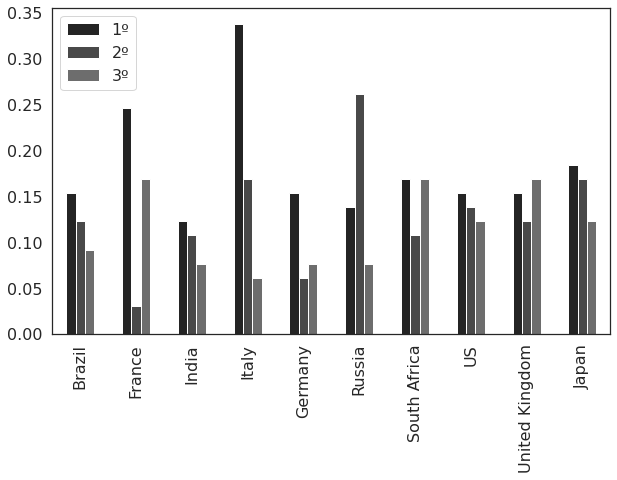

In [80]:
sns.set_theme(style='white', palette='binary_r')
# results.loc[['1st', '2nd','3rd]].T.plot.bar(figsize=(10,6))
results.loc[['1º', '2º','3º']].T.plot.bar(figsize=(10,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left')
plt.savefig(f"../images/selection/oracle.pdf", bbox_inches='tight')

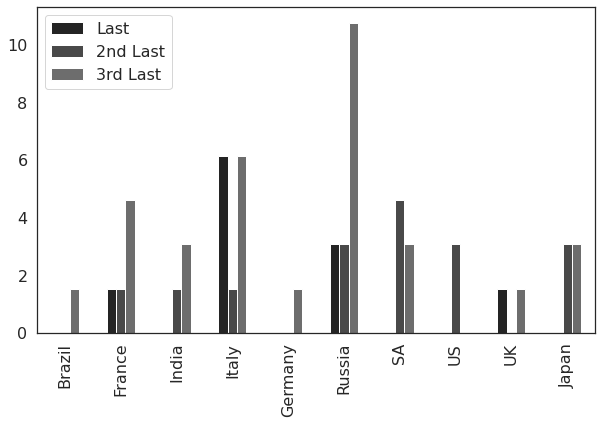

In [127]:
sns.set_theme(style='white', palette='binary_r')
results.loc[['Last', '2nd Last','3rd Last']].T.plot.bar(figsize=(10,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left')
plt.savefig(f"../images/selection/worst.pdf", bbox_inches='tight')

In [ ]:
results = pd.concat([results.T,results.loc[['Best', 'Best-1','Best-2']].sum(axis=0), results.loc[['Worst', 'Worst-1','Worst-2']].sum(axis=0)], axis=1).rename({0:'Best Sum', 1: 'Worst Sum'}, axis=1)

In [ ]:
#results['Top 3'] ['Bottom 3']
results

0Size  Best  Best-1  Best-2  Worst  Worst-1  Worst-2  \
Russia                 11.0   9.5    15.9    20.6    1.6      1.6      6.3   
Brazil                 10.0  14.3    17.5    17.5    4.8      3.2      7.9   
Italy                   9.0  11.1    11.1    14.3    4.8     15.9     12.7   
Spain                  10.0  12.7    28.6    20.6    9.5     12.7      4.8   
Germany                10.0  19.0     9.5    14.3    1.6      4.8     11.1   
Mexico                 14.0   9.5    12.7    20.6    3.2      3.2      4.8   
South Africa           11.0   4.8    28.6     9.5    3.2      4.8      6.3   
Argentina               7.0  17.5    22.2    20.6    9.5      7.9      6.3   
United Kingdom         10.0   7.9    15.9    12.7    1.6     11.1     11.1   
Canada                 13.0   9.5     6.3    12.7    1.6      4.8      1.6   
France                  7.0  22.2    27.0    25.4    1.6      4.8     19.0   
Australia               7.0  27.0    19.0    20.6    1.6      9.5     22.2   
Qatar                   9.0  19.0    14.3    11.1    1.6      3.2      7.9   
Portugal                9.0   9.5     9.5    15.9    3.2      4.8      9.5   
India                  12.0  17.5    11.1     6.3    1.6      3.2      4.8   
China                   4.0  19.0    49.2    22.2    9.5     22.2     49.2   
US                     11.0  14.3     9.5    19.0    1.6      6.3      7.9   
Japan                   9.0  20.6    14.3    12.7    6.3     12.7      9.5   
Israel                 11.0  20.6    17.5    19.0    3.2      1.6      1.6   
Iran                    9.0  14.3    15.9    14.3    1.6      4.8      6.3   
United Arab Emirates   13.0  19.0    15.9     4.8    3.2      1.6      1.6   

                      Best Sum  Worst Sum  
Russia                    46.0        9.5  
Brazil                    49.3       15.9  
Italy                     36.5       33.4  
Spain                     61.9       27.0  
Germany                   42.8       17.5  
Mexico                    42.8       11.2  
South Africa              42.9       14.3  
Argentina                 60.3       23.7  
United Kingdom            36.5       23.8  
Canada                    28.5        8.0  
France                    74.6       25.4  
Australia                 66.6       33.3  
Qatar                     44.4       12.7  
Portugal                  34.9       17.5  
India                     34.9        9.6  
China                     90.4       80.9  
US                        42.8       15.8  
Japan                     47.6       28.5  
Israel                    57.1        6.4  
Iran                      44.5       12.7  
United Arab Emirates      39.7        6.4

In [ ]:
#results[selected_countries].T.style.to_latex('selection_rate_AS',  caption='selection_rate_AS', hrules=True, label='rmse_metrics', position='H', position_float="centering")
results.sort_index().style.format('{:.1f}').to_latex('selection_rate_AS',  caption='selection_rate_AS', hrules=True, label='rmse_metrics', position='H', position_float="centering")

In [ ]:
results.sort_index().style.format('{:.1f}').to_latex('selection_rate_AE',  caption='selection_rate_AE', hrules=True, label='rmse_metrics', position='H', position_float="centering")

In [ ]:
pick_rate = {}
for country in selected_countries:
    picks = np.equal(selections[country]['ASDS']['0'].values,selections[country]['ASO']['0'][5:].reset_index(drop=True).values)
    pick_rate[country] = (picks.sum()/len(picks)).round(2)
pick_rate

{'Brazil': 0.22,
 'US': 0.32,
 'Mexico': 0.15,
 'United Kingdom': 0.25,
 'France': 0.35,
 'Italy': 0.23,
 'Russia': 0.18,
 'South Africa': 0.2,
 'India': 0.17,
 'Israel': 0.23}

In [ ]:
pd.DataFrame(pick_rate.values(), index=pick_rate.keys()).rename({0:'Rate'}, axis=1)

Rate
Brazil          0.22
US              0.32
Mexico          0.15
United Kingdom  0.25
France          0.35
Italy           0.23
Russia          0.18
South Africa    0.20
India           0.17
Israel          0.23

In [ ]:
pd.DataFrame(pick_rate.values(), index=pick_rate.keys()).style.format('{:.2f}').to_latex('oracle_pick_ASDS',  caption='Pick rate: ASDS x ASO', hrules=True, label='pr_asds', position='H', position_float="centering")

In [ ]:
# for country in selected_countries:
#     fig, ax = plt.subplots(figsize=(10,6))
#     #print(selections[country]['ASDS']['0'].shape)
#     #print(selections[country]['ASO']['0'][5:].reset_index(drop=True).shape)
#     #selections[country]['ASDS']['0'].plot.bar(ax=ax, label='ASDS')
#     #selections[country]['ASO']['0'][5:].reset_index(drop=True).plot.bar(ax=ax, label='ASO', color='orange')
#     pd.concat([selections[country]['ASDS']['0'], selections[country]['ASO']['0'][5:].reset_index(drop=True)], axis=1).plot.bar(ax=ax, label=['ASDS', 'ASO'])
#     #plt.set_label(['ASDS', 'ASO'])
#     plt.legend()
#     plt.title(country)


In [ ]:
for country in selected_countries:
    print(predictions[country]['AEDS4']['0'].shape)
    print(predictions[country]['AEO']['0'][6:].shape)
    print(data[country]['test_data'][country][8:].shape)

(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)
(63,)


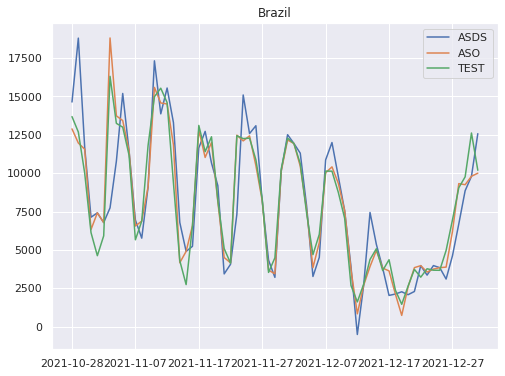

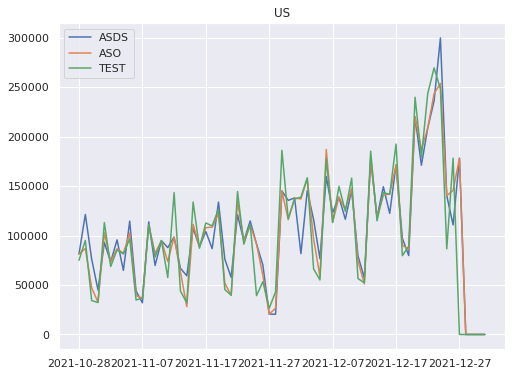

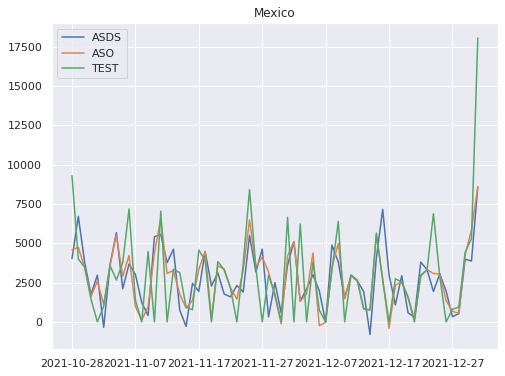

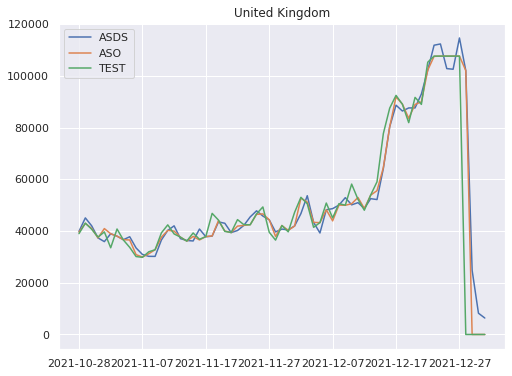

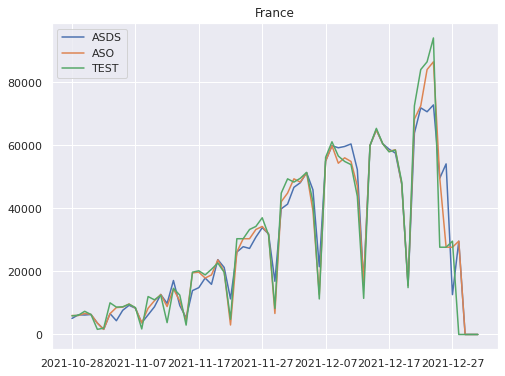

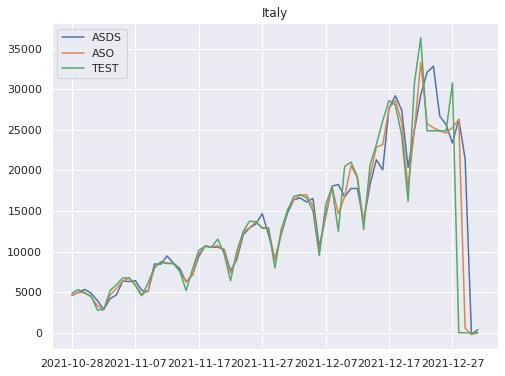

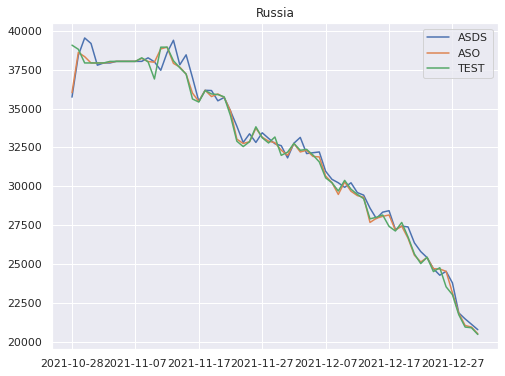

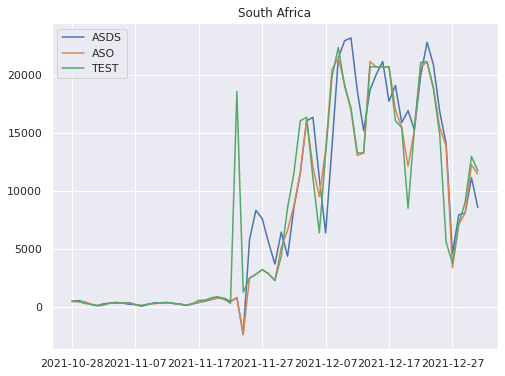

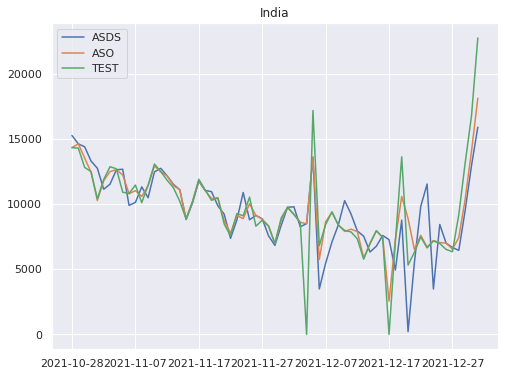

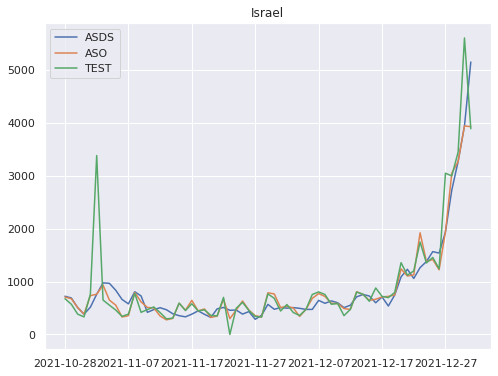

In [ ]:
for country in selected_countries:
    fig, ax = plt.subplots(figsize=(8,6))
    predictions[country]['ASDS']['0'].plot(ax=ax, label='ASDS')
    predictions[country]['ASO']['0'][5:].reset_index(drop=True).plot(ax=ax, label='ASO')
    data[country]['test_data'][country][6:].reset_index(drop=True).plot(ax=ax, label='TEST')
    plt.legend()
    plt.title(country)



### AE

In [ ]:
mse_dict = {}
mse_dict2 = {}
mse_dict3 = {}
for country in selected_countries:
    df = pd.DataFrame(predictions[country]['AE'])
    df2 = pd.DataFrame(predictions[country]['AEDS'])
    df3 = pd.DataFrame(predictions[country]['AEO'])
    #fig, axs = plt.subplots(1,df.shape[-1],figsize=(30,6))
    test = data[country]['test_data'][country].reset_index(drop=True)
    mse_dict[country] = {}
    mse_dict2[country] = {}
    mse_dict3[country] = {}
    for col in df.columns:
        k = int(col)        
        #print(df[col].shape)
        #print(test.shape)
        #axs[k].plot(df[col],label=col)
        #axs[k].set_xticklabels([])
        #axs[k].plot(test, label='test')
        #mse = mean_squared_error(test.iloc[7:], df[col].iloc[7:], squared=False)
        mse = mape(test.iloc[7:], df[col].iloc[7:])
        #mse = mean_absolute_percentage_error(test, df[col])
        #print(pred[0], k, mse)
        #axs[k].annotate('RMSE: '+ '{:,.0f}'.format(mse), xy=(0, -13),  xycoords='axes points', xytext=(0,-13), textcoords='offset points')
        #axs[k].annotate('MAPE: '+ '{:,.2f}'.format(mse*100), xy=(0, -13),  xycoords='axes points', xytext=(0,-13), textcoords='offset points')
        #axs[k].set_title(country+'_'+col)
        #axs[k].legend()
        mse_dict[country][k] = mse        
        #df[col].plot(ax=ax, label='AS')
        #data[country]['test_data'][country][6:].reset_index(drop=True).plot(ax=ax, label='TEST')
        #plt.legend()
    #mse = mean_squared_error(test.iloc[7:], df2, squared=False)
    mse = mape(test.iloc[7:], df2)
    mse_dict2[country]['AEDS'] = mse
    #mse = mean_squared_error(test.iloc[7:], df3.iloc[5:], squared=False)
    mse = mape(test.iloc[7:], df3.iloc[5:])
    mse_dict3[country]['AEO'] = mse
    #axs[0].annotate('LOWEST ERROR (MODEL): '+ '{:,.0f} ({})'.format(np.array(mse_list).min(), np.array(mse_list).argmin()), xy=(0, -20),  xycoords='axes points', xytext=(0,-20), textcoords='offset points') 
    # fig, ax = plt.subplots(figsize=(8,6))
    # predictions[country]['AS']['0'].plot(ax=ax, label='AS')
    # plt.legend()
    # plt.title(country)

In [ ]:
mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))
#mse_df = mse_df.append(mse_df.idxmin(axis=0).T, ignore_index=True)
mse_df = mse_df.applymap(lambda x: '{:.3f}'.format(x))
mse_df = mse_df.rename(countries_labels, axis=1)
#mse_df = mse_df.rename({len(mse_df)-1: 'Lowest Error Model'})
mse_df = mse_df.replace({'nan':'1'})

mse_df.style.to_latex('mse_AE',  caption='Pool Errors', hrules=True, label='error_as', position='h', position_float="centering")
mse_df.drop('AEO').style.highlight_min(axis=0,
                           props='bfseries: ;').to_latex('mse_AE_hl',  caption='Pool Errors', hrules=True, label='error_ae', position='h', position_float="centering")
#mse_df.style.to_latex('mse_AE',  caption='Pool Errors', hrules=True, label='error_as', position='H', position_float="centering")



/tmp/ipykernel_5696/2468165514.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))
/tmp/ipykernel_5696/2468165514.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_df = pd.DataFrame(mse_dict).append(pd.DataFrame(mse_dict2)).append(pd.DataFrame(mse_dict3))


### AEDS

In [ ]:
corrs = {}
for country in selected_countries:
    corrs[country] = selections[country]['AEDS']['0'].corr(selections[country]['AEO']['0'][5:].reset_index(drop=True))
corrs = pd.DataFrame.from_dict(corrs,'index').round(2).rename({0:'Correlation'}, axis=1)

In [ ]:
corrs

Correlation
Brazil                -0.18
US                     0.08
Mexico                 0.25
United Kingdom        -0.12
France                 0.17
Italy                 -0.13
Russia                -0.06
South Africa          -0.06
India                  0.30
Israel                 0.24

In [ ]:
corrs.style.format('{:.2f}').to_latex('oracle_correlation_AEDS', hrules=True, caption='AEDS x AEO', label='corr_aeds', position='h', position_float="centering")

In [ ]:
predictions['Russia']['AS']

0        1        2             3             4  \
2021-10-22      0.000000      0.0      0.0      0.000000      0.000000   
2021-10-23  34884.114518  36205.0  36205.0  36106.117746  36170.331773   
2021-10-24  36725.138674  36728.0  36728.0  36613.917866  36726.935323   
2021-10-25  36609.062631  34690.0  34690.0  35055.037615  34693.888839   
2021-10-26  36408.666065  36947.0  36947.0  36587.596576  36942.698447   
...                  ...      ...      ...           ...           ...   
2021-12-27  23703.025251  23543.0  23543.0  23416.398497  23160.302835   
2021-12-28  21845.548279  23036.0  23036.0  22649.507534  21989.674442   
2021-12-29  20508.277443  21751.0  21751.0  21661.770657  21215.939391   
2021-12-30  21256.293946  20957.0  20957.0  21262.762613  21453.896557   
2021-12-31  21096.057329  20914.0  20914.0  20591.006313  20175.352042   

                       5             6        7             8             9  \
2021-10-22      0.000000      0.000000      0.0      0.000000      0.000000   
2021-10-23  37412.958098  36115.514053  36205.0  36205.000000  36205.000000   
2021-10-24  37379.286343  34792.867982  36728.0  36728.000000  36728.000000   
2021-10-25  33942.409630  35967.358177  34690.0  34690.000000  34690.000000   
2021-10-26  37343.605690  36616.190459  36947.0  36947.000000  36947.000000   
...                  ...           ...      ...           ...           ...   
2021-12-27  22641.027618  22413.967546  23543.0  23151.439354  23353.426242   
2021-12-28  22083.567479  23811.909622  23036.0  22580.434249  22378.353310   
2021-12-29  21060.517661  20337.915712  21751.0  21492.887908  21604.379919   
2021-12-30  20561.810918  22298.238407  20957.0  21127.680281  21227.359014   
2021-12-31  20290.511885  19574.806892  20914.0  20527.459363  20872.648233   

                      10       11  
2021-10-22      0.000000      0.0  
2021-10-23  34731.599107  36205.0  
2021-10-24  37685.245251  36728.0  
2021-10-25  34148.184071  34690.0  
2021-10-26  37234.834522  36947.0  
...                  ...      ...  
2021-12-27  23794.379419  23543.0  
2021-12-28  21867.678029  23036.0  
2021-12-29  21481.010820  21751.0  
2021-12-30  21138.104573  20957.0  
2021-12-31  20789.086996  20914.0  

[71 rows x 12 columns]

In [ ]:
selections[country]['AEDS4']['0'].astype('int').values

array([6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 7, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 8, 8, 8, 8, 6, 6, 6, 8, 6, 6, 6, 6, 8, 8, 8, 8])

In [ ]:
np.equal(selections[country]['AEDS4']['0'].astype('int').values,selections[country]['AEO']['0'][6:].reset_index(drop=True).values)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False])

In [ ]:
pick_rate = {}
for country in selected_countries:
    picks = np.equal(selections[country]['AEDS4']['0'].astype('int').values,selections[country]['AEO']['0'][6:].reset_index(drop=True).values)
    pick_rate[country] = (picks.sum()/len(picks)).round(2)
pick_rate

{'Brazil': 0.14,
 'US': 0.08,
 'Mexico': 0.11,
 'United Kingdom': 0.1,
 'France': 0.33,
 'Italy': 0.06,
 'Russia': 0.1,
 'South Africa': 0.19,
 'India': 0.1,
 'Israel': 0.16}

In [ ]:
pick_rate = pd.DataFrame(pick_rate.values(), index=pick_rate.keys()).rename({0:'Rate'}, axis=1)

In [ ]:
pick_rate.style.format('{:.2f}').to_latex('oracle_pick_AEDS',  caption='Pick rate: AEDS x AEO', hrules=True, label='pr_aeds', position='H', position_float="centering")

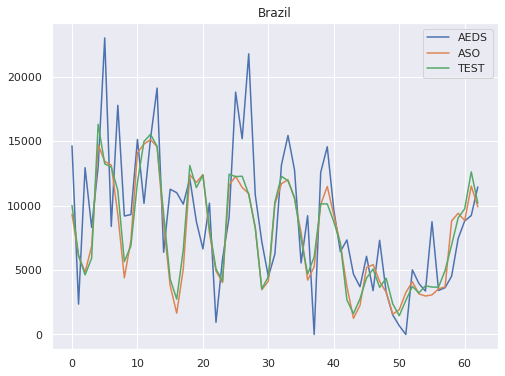

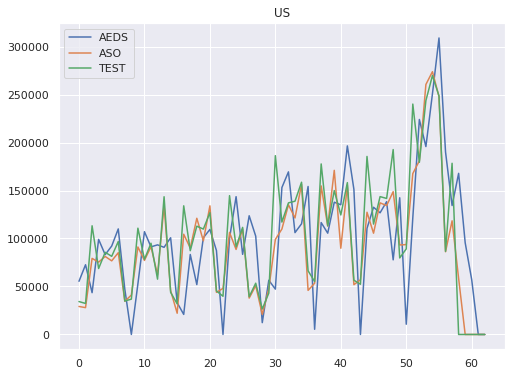

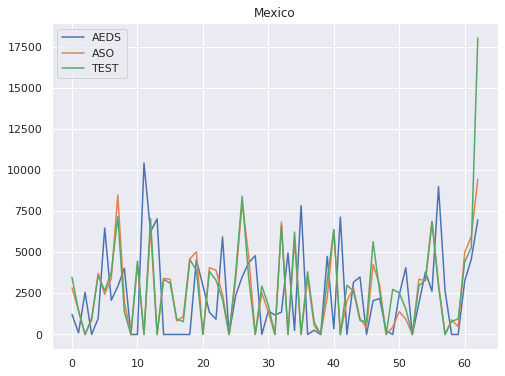

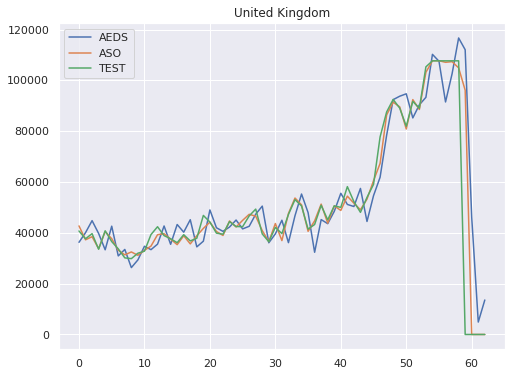

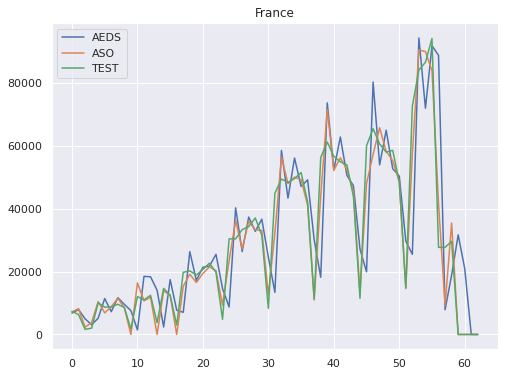

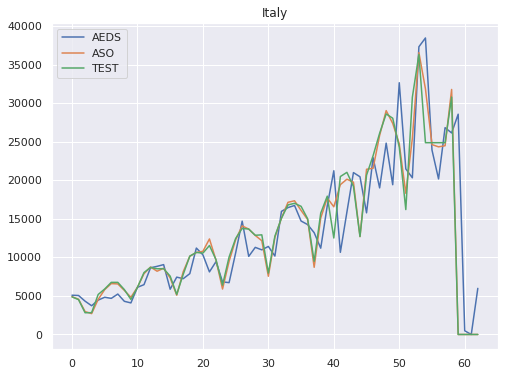

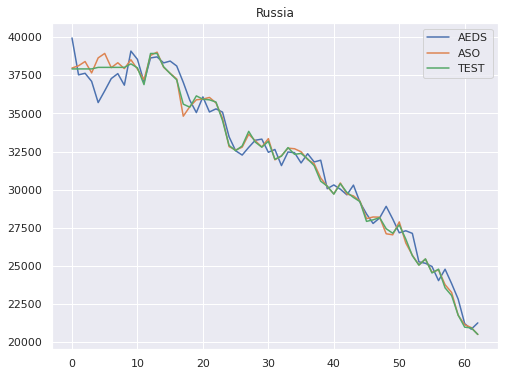

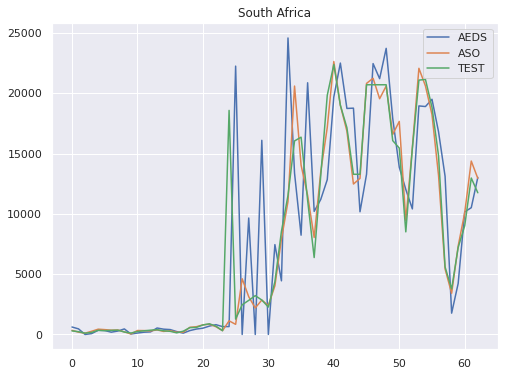

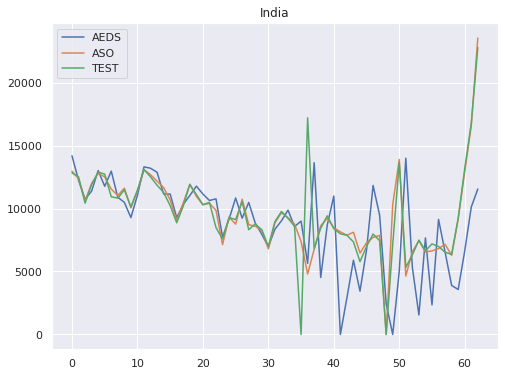

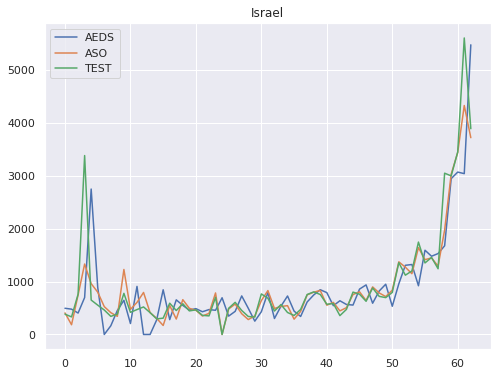

In [ ]:
for country in selected_countries:
    fig, ax = plt.subplots(figsize=(8,6))
    predictions[country]['AEDS4']['0'].plot(ax=ax, label='AEDS')
    predictions[country]['AEO']['0'][6:].reset_index(drop=True).plot(ax=ax, label='ASO')
    data[country]['test_data'][country][8:].reset_index(drop=True).plot(ax=ax, label='TEST')
    plt.legend()
    plt.title(country)



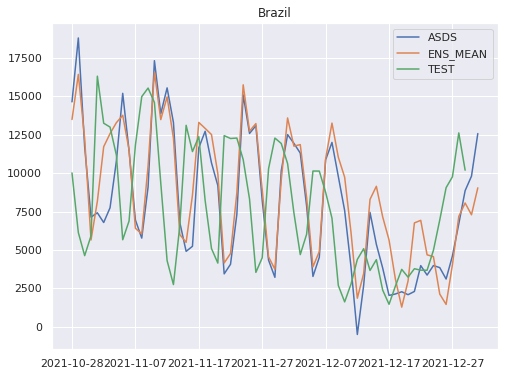

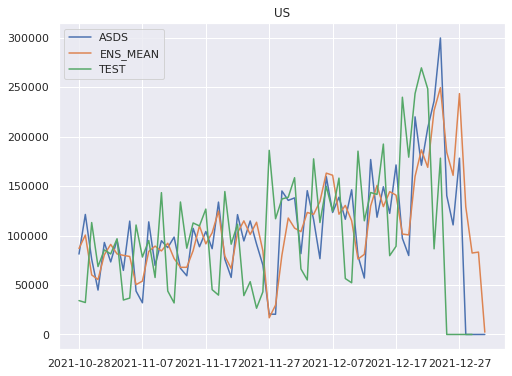

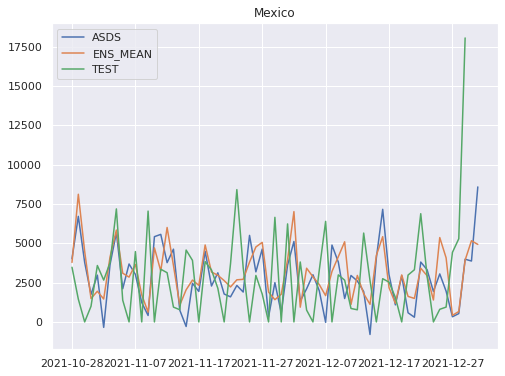

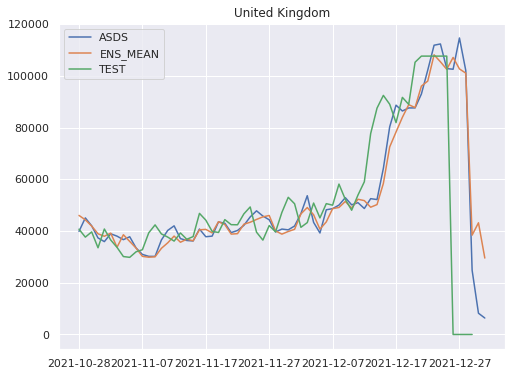

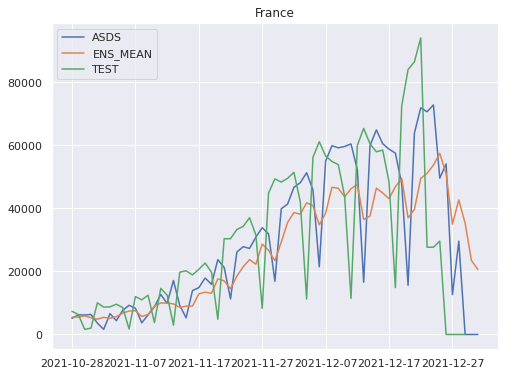

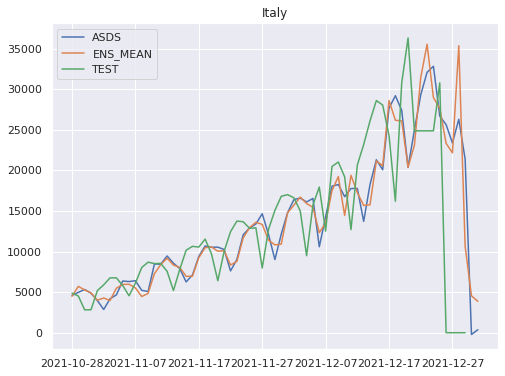

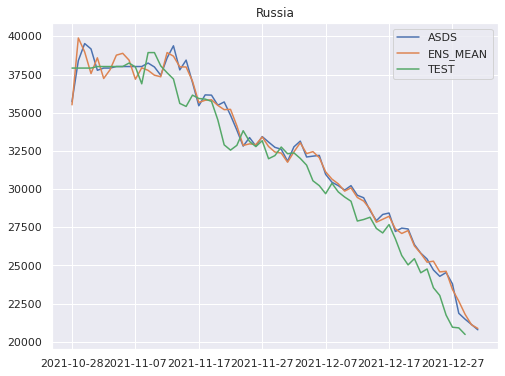

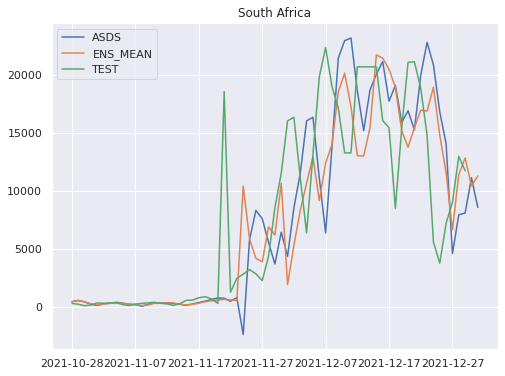

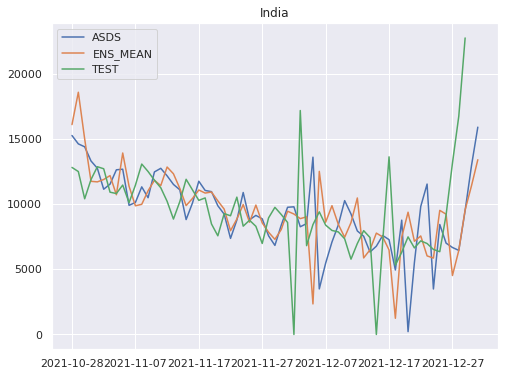

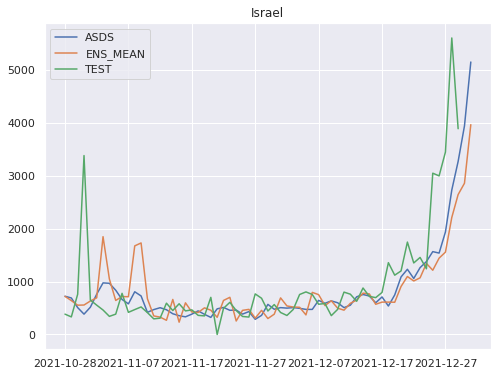

In [ ]:
for country in selected_countries:
    fig, ax = plt.subplots(figsize=(8,6))
    predictions[country]['ASDS']['0'].plot(ax=ax, label='ASDS')
    predictions[country]['ensemble']['0'][6:].reset_index(drop=True).plot(ax=ax, label='ENS_MEAN')
    data[country]['test_data'][country][8:].reset_index(drop=True).plot(ax=ax, label='TEST')
    plt.legend()
    plt.title(country)


# Trend

/tmp/ipykernel_6232/2325200098.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2, figsize=(12,6))


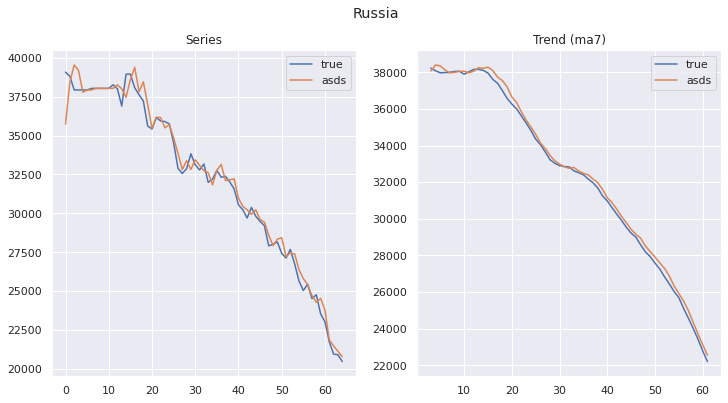

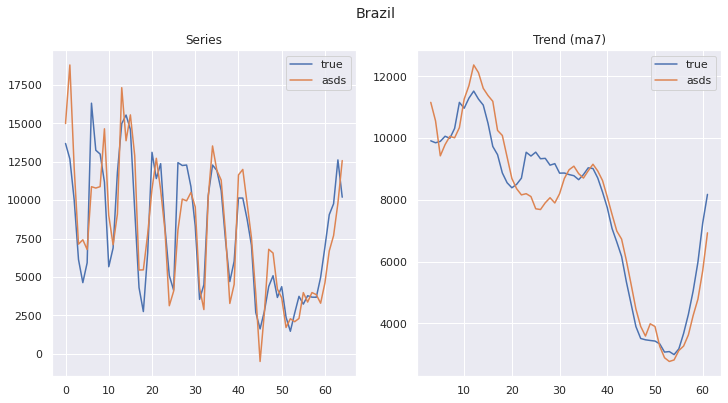

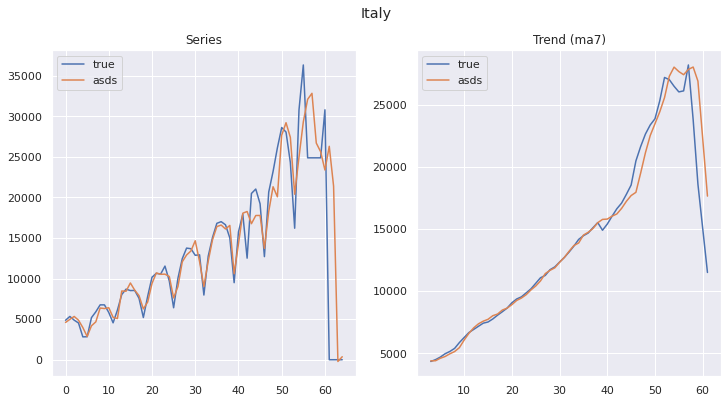

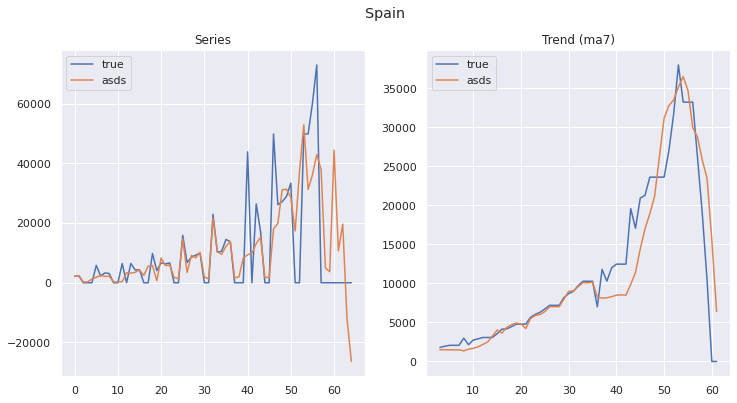

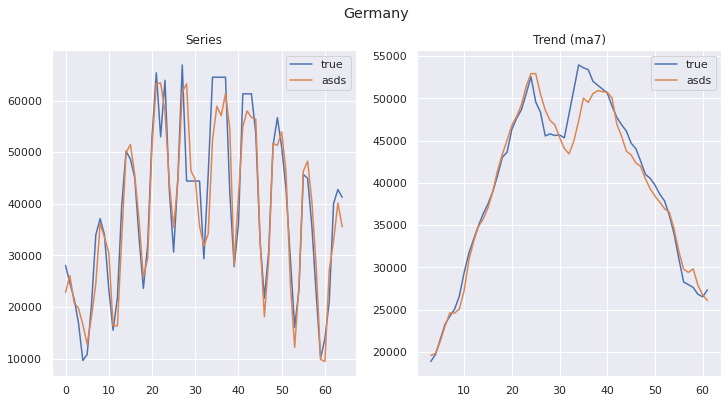

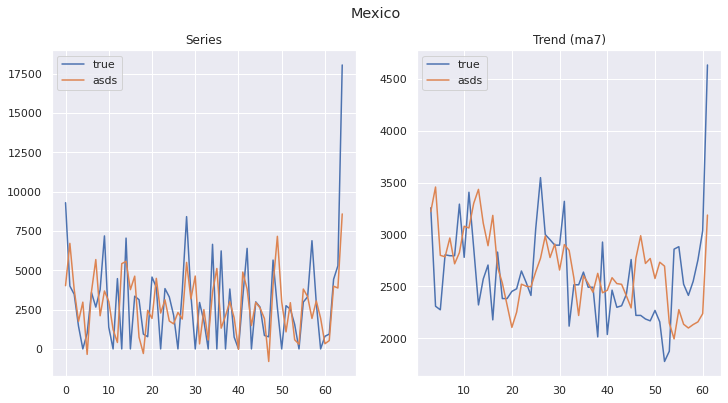

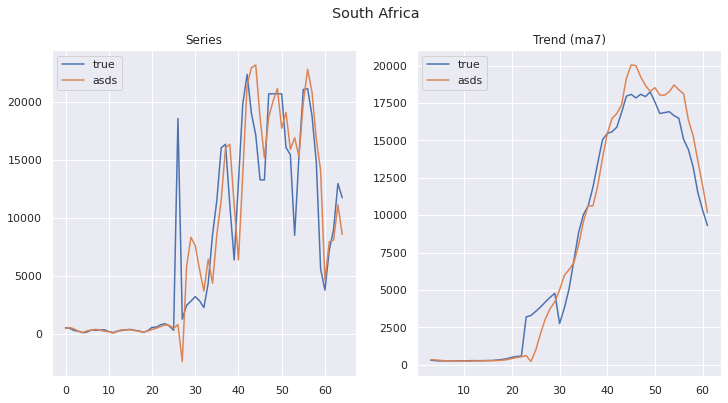

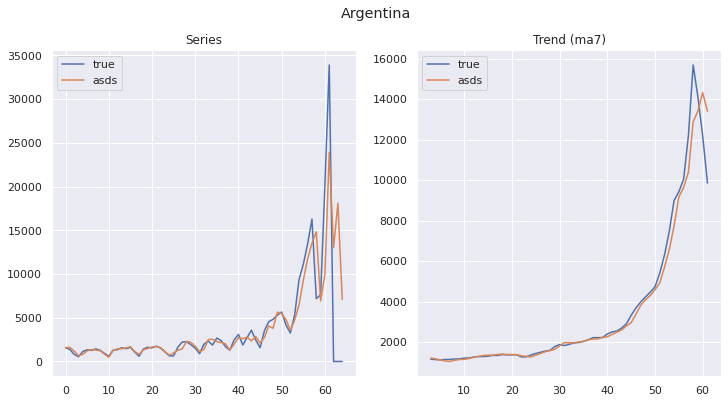

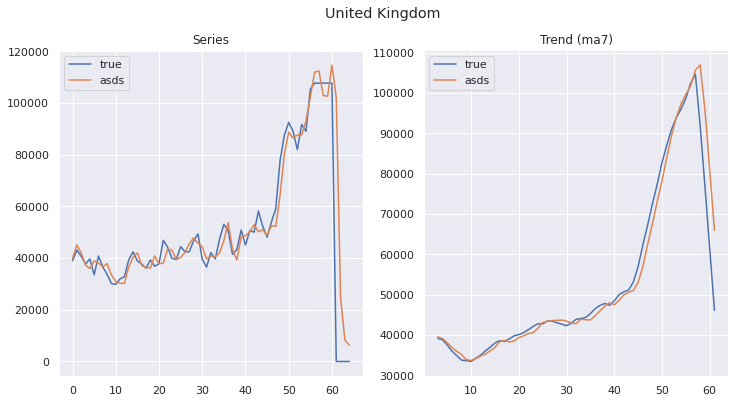

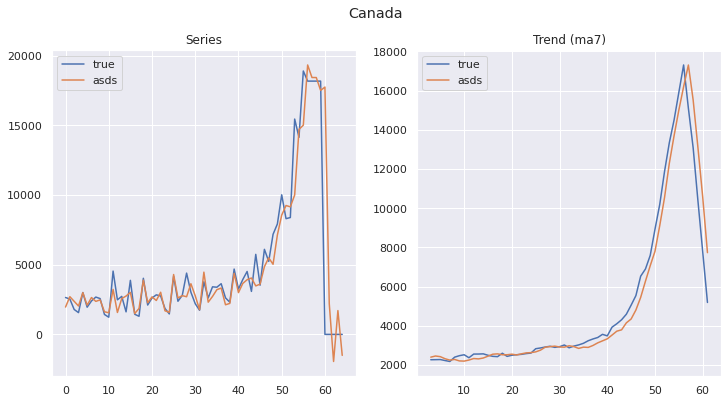

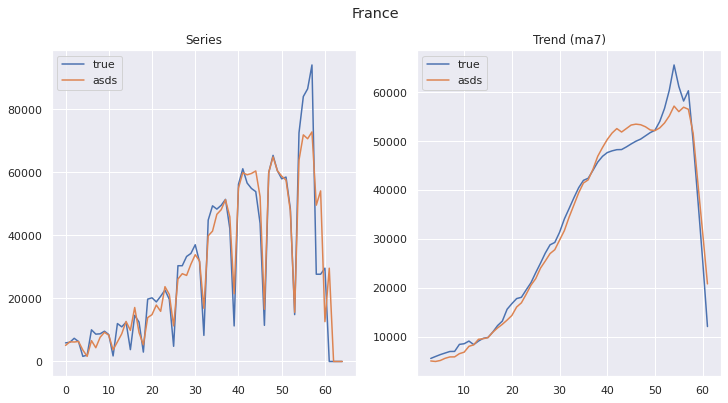

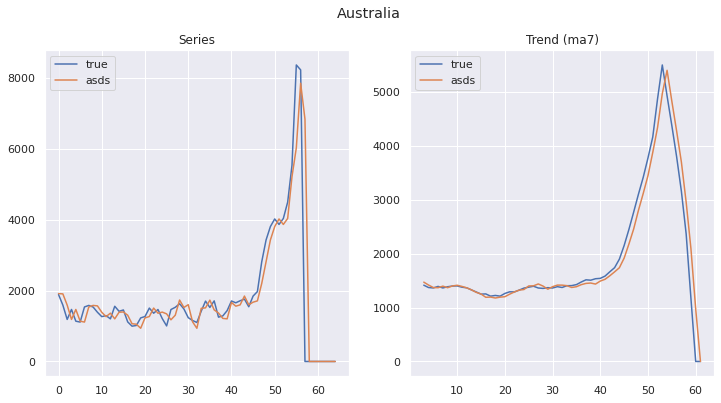

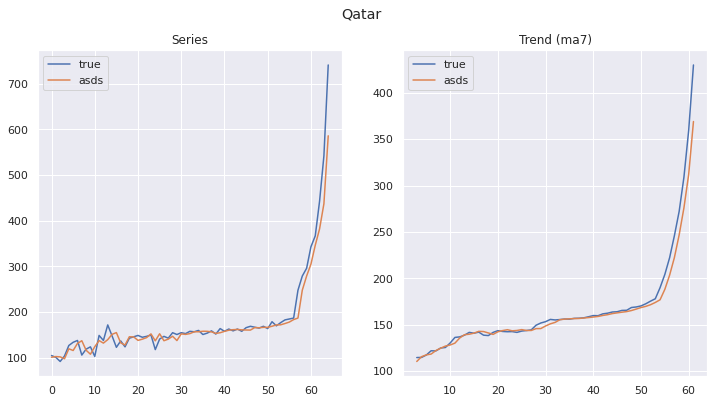

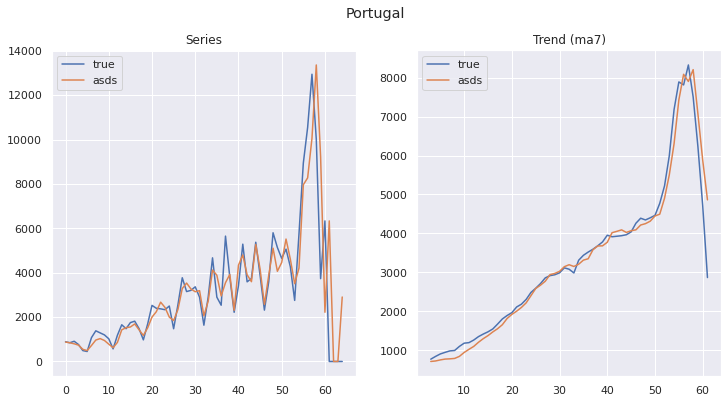

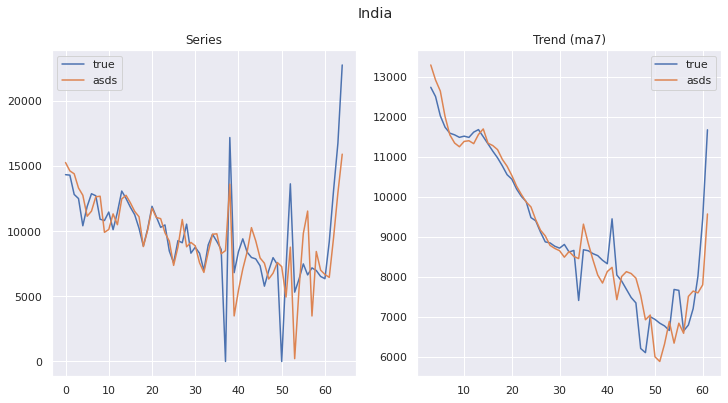

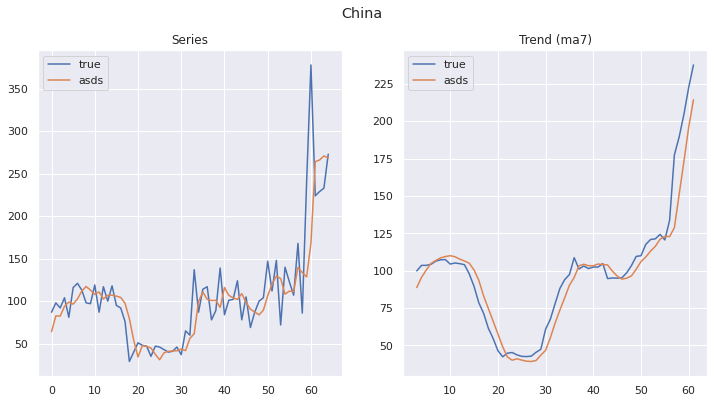

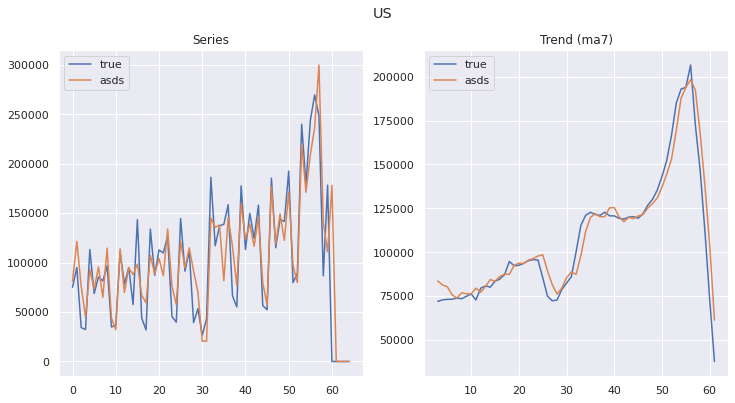

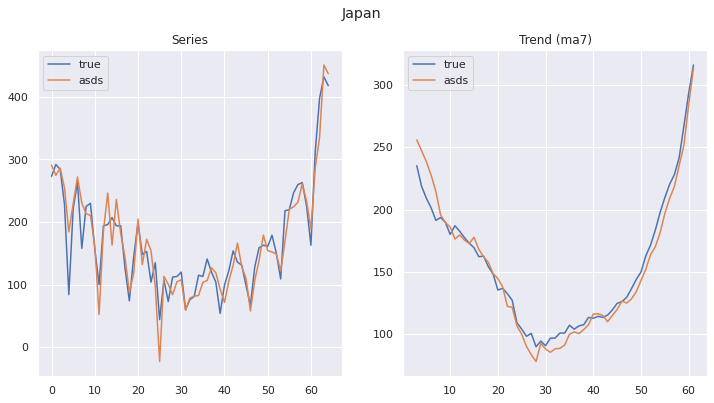

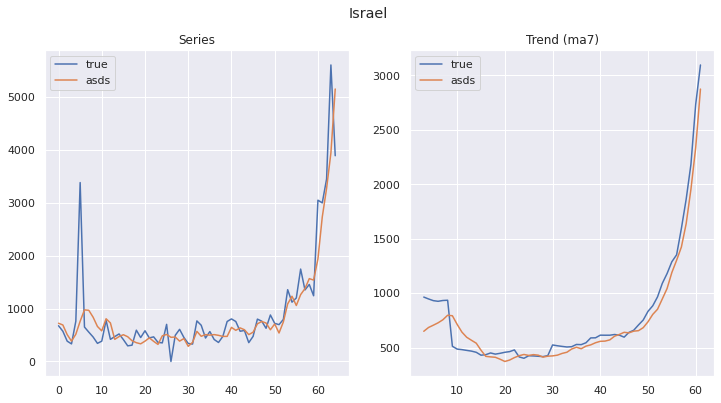

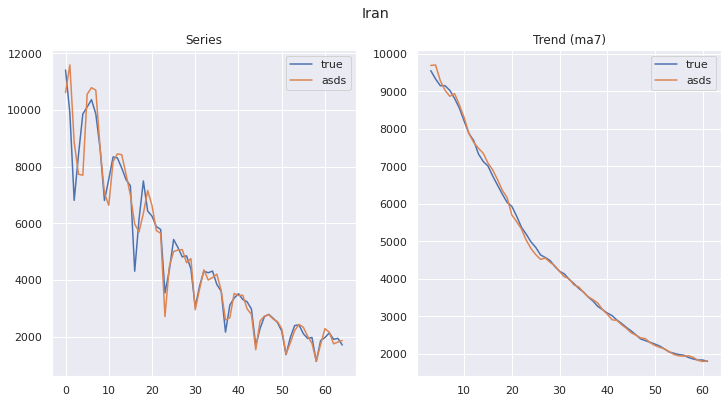

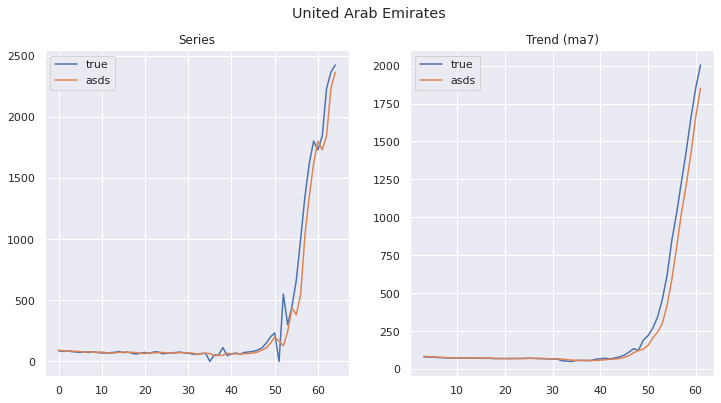

In [ ]:
for pred, true in zip(predictions.items(), data.values()):
    country = pred[0]
    pred = pred[1]
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(pd.concat([true['test_data'].iloc[-65:].reset_index(drop=True), pred['ASDS'].reset_index(drop=True)], axis=1), label=['true', 'asds'])
    axs[0].set_title('Series')
    axs[0].legend()
    axs[1].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['ASDS'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'asds'])
    axs[1].set_title('Trend (ma7)')
    plt.legend()    
    fig.suptitle(country)
    

/tmp/ipykernel_5696/346749964.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,5, figsize=(20,6))


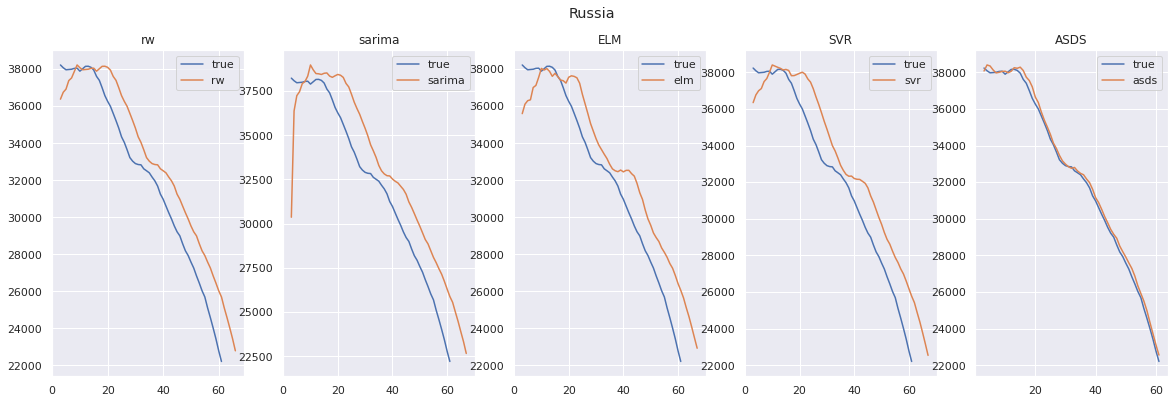

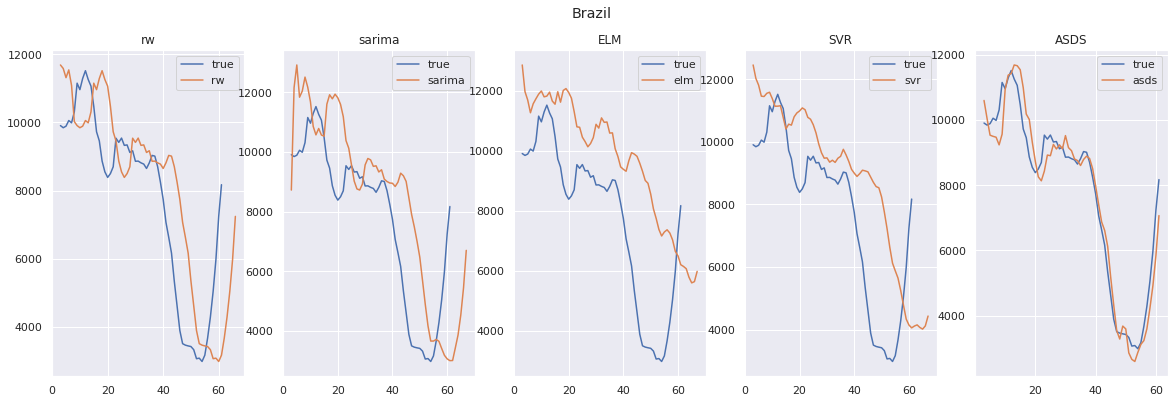

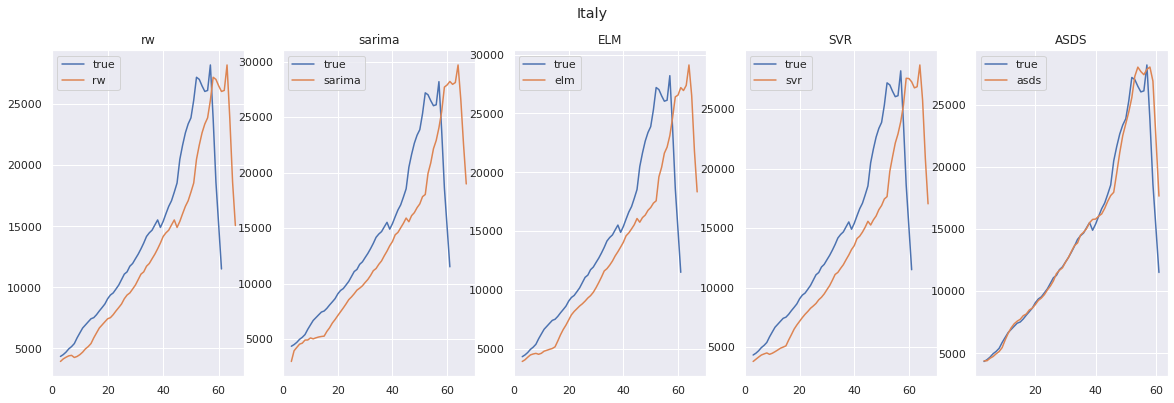

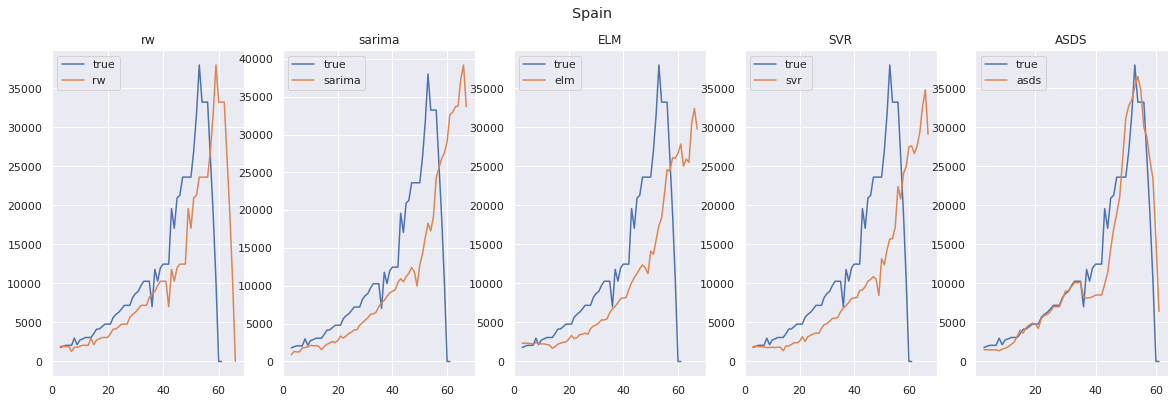

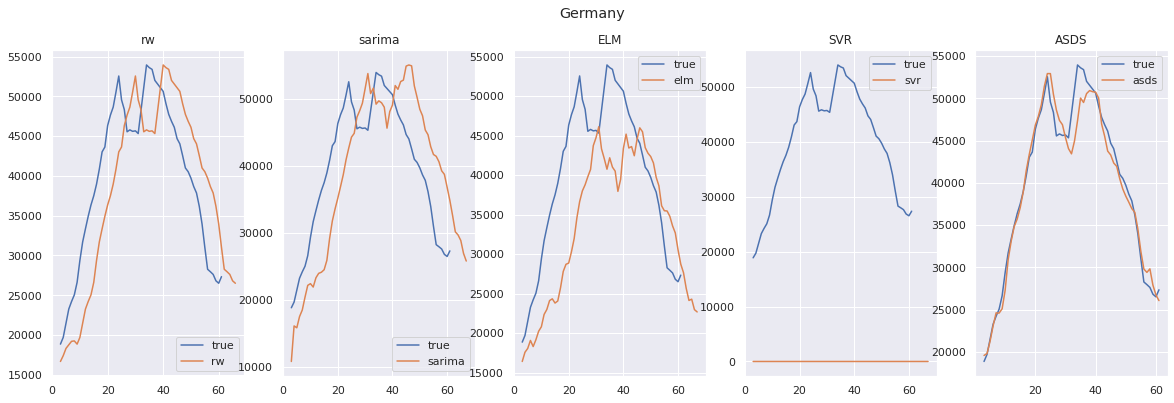

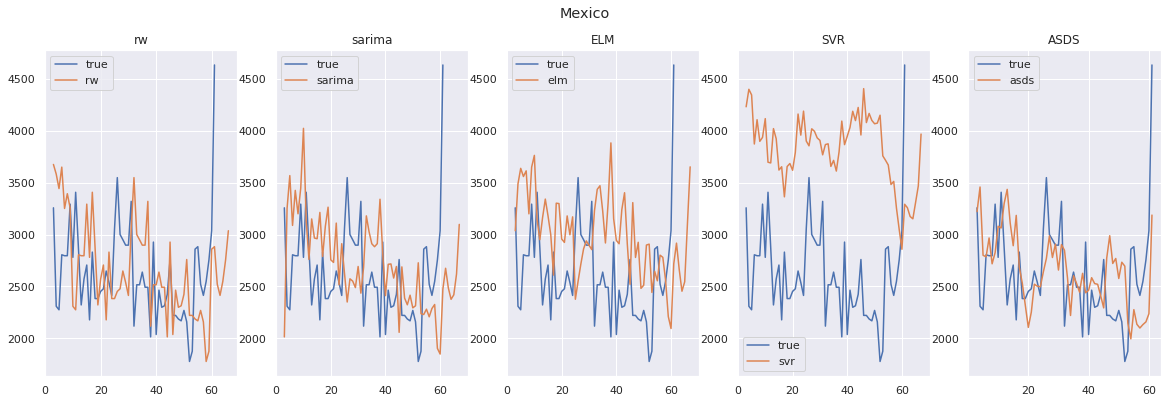

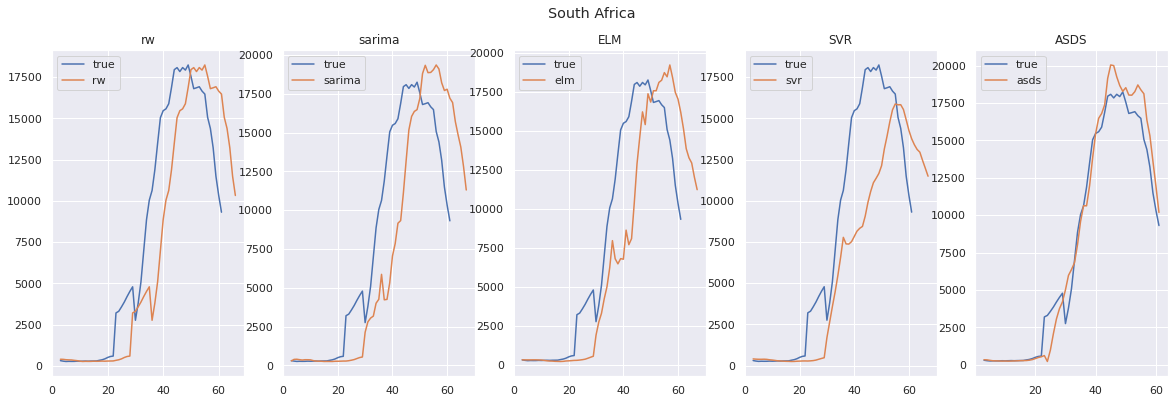

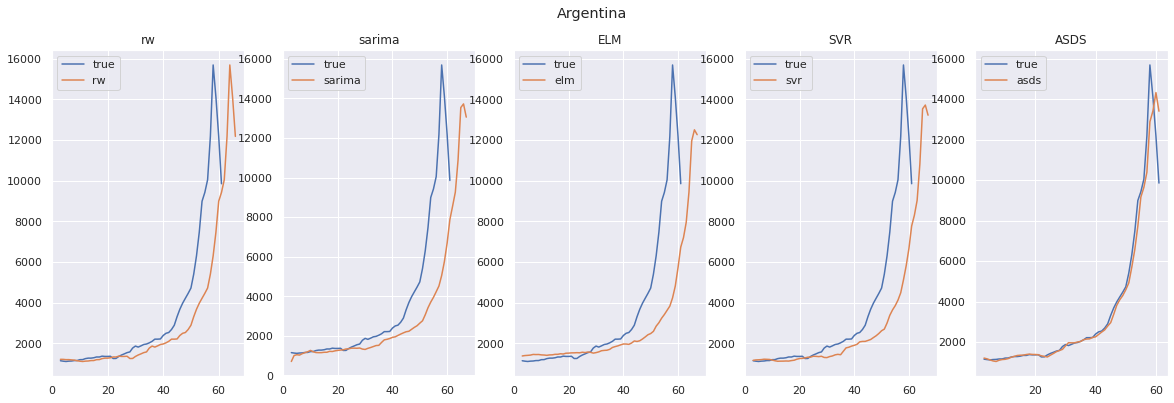

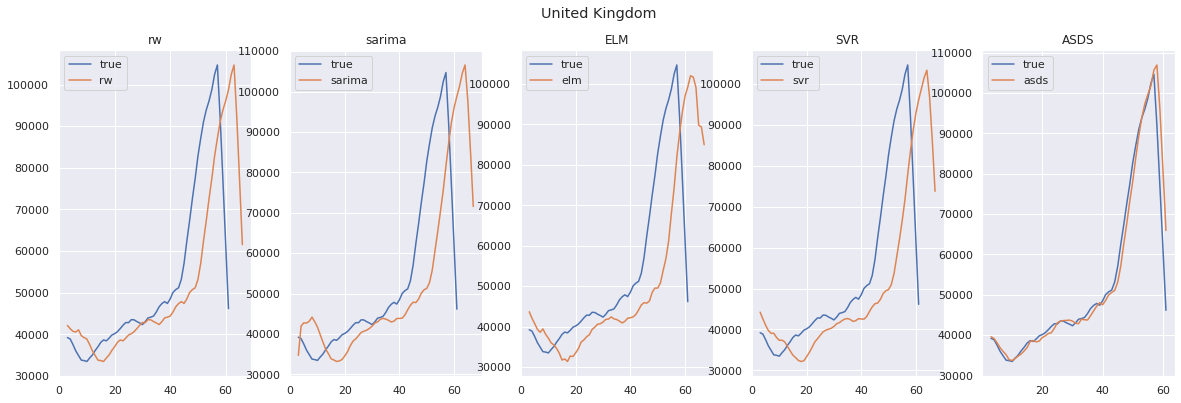

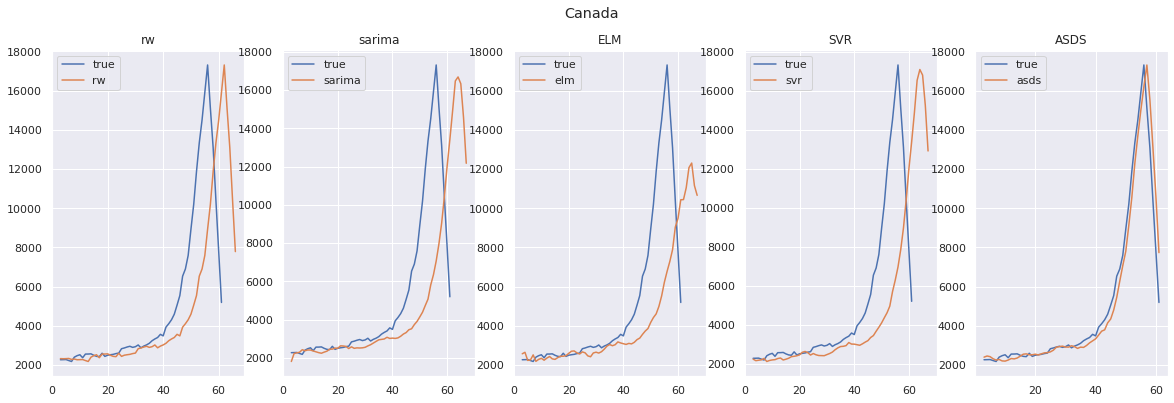

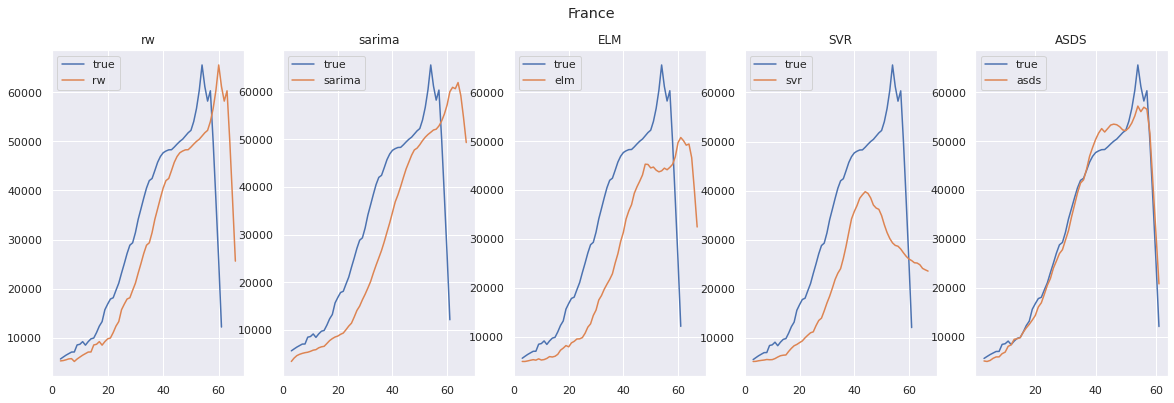

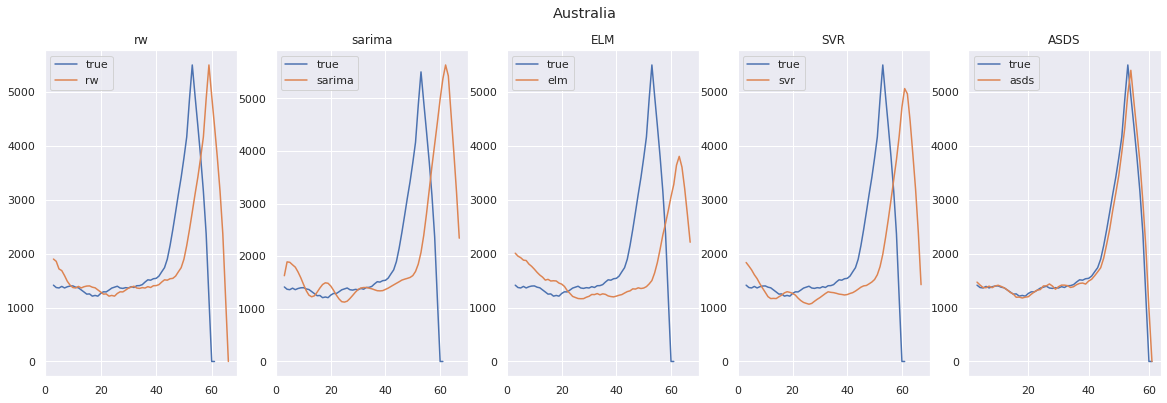

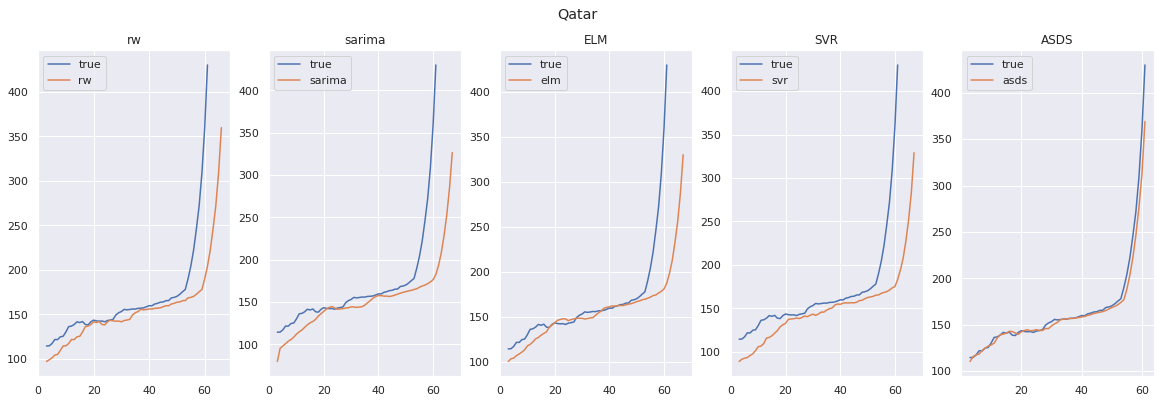

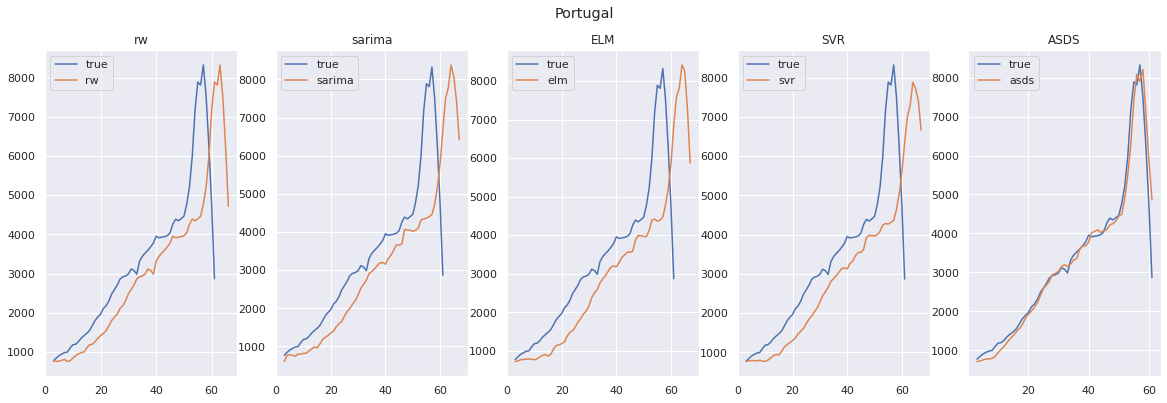

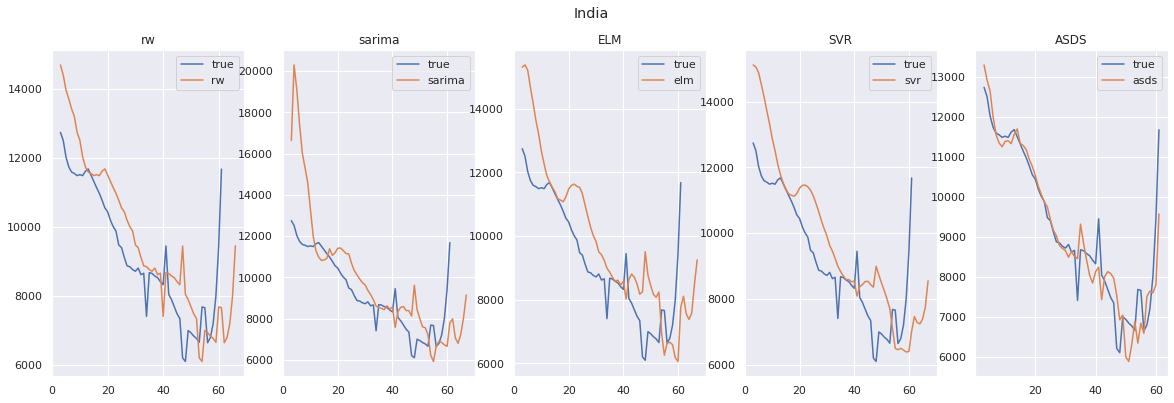

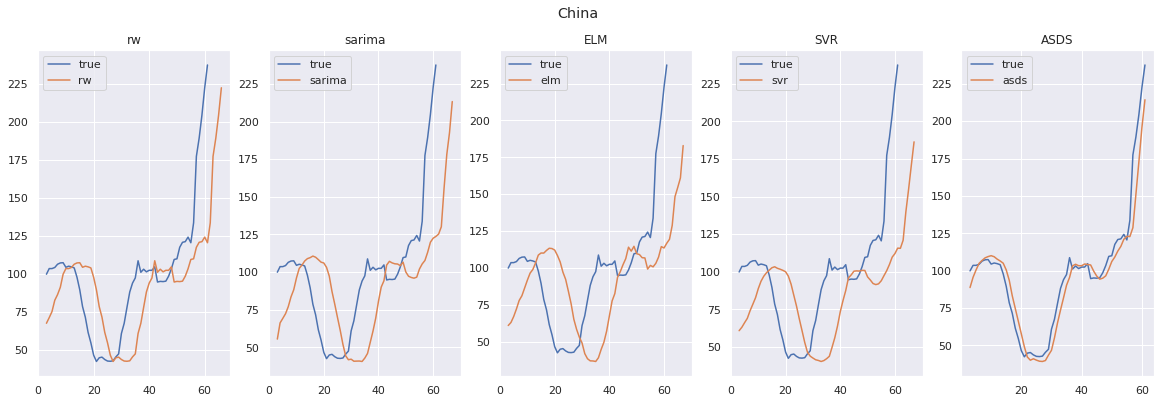

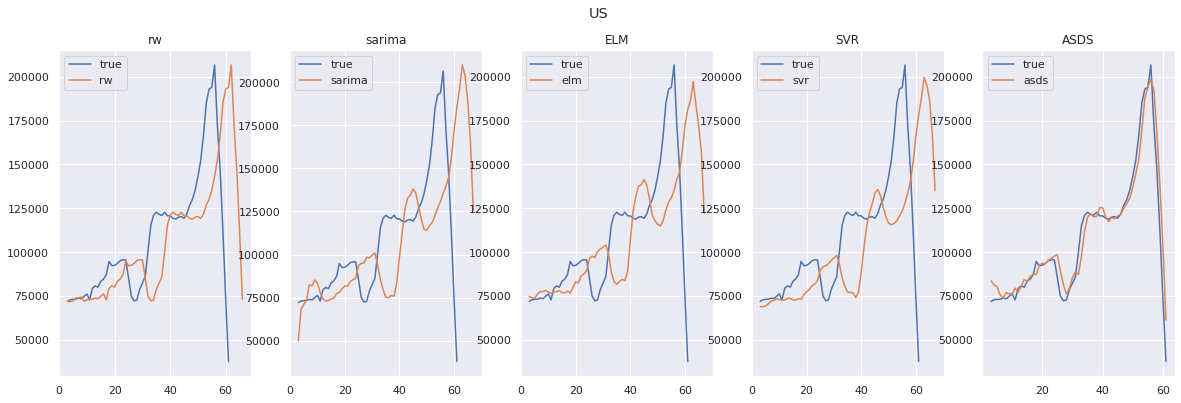

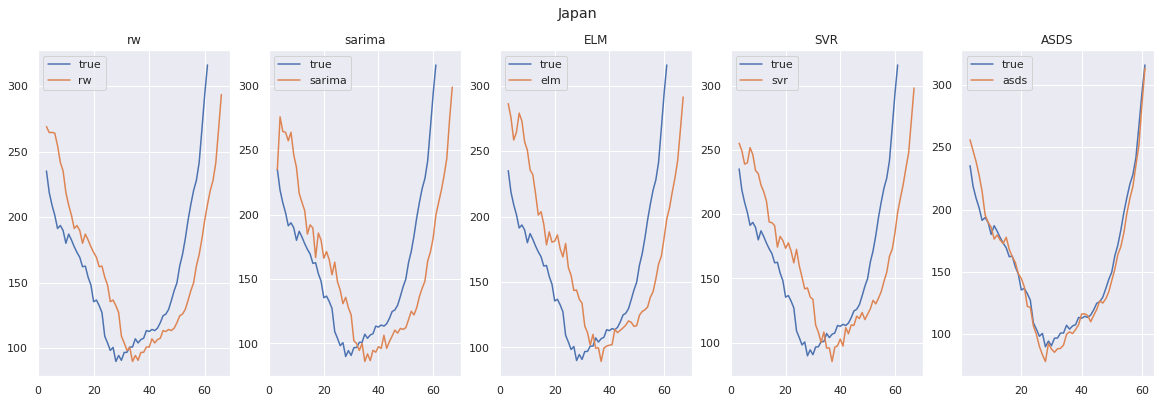

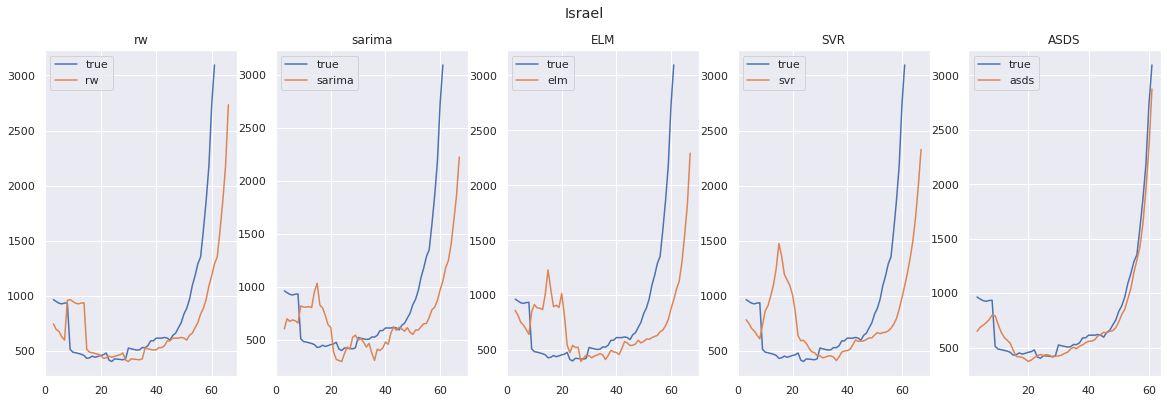

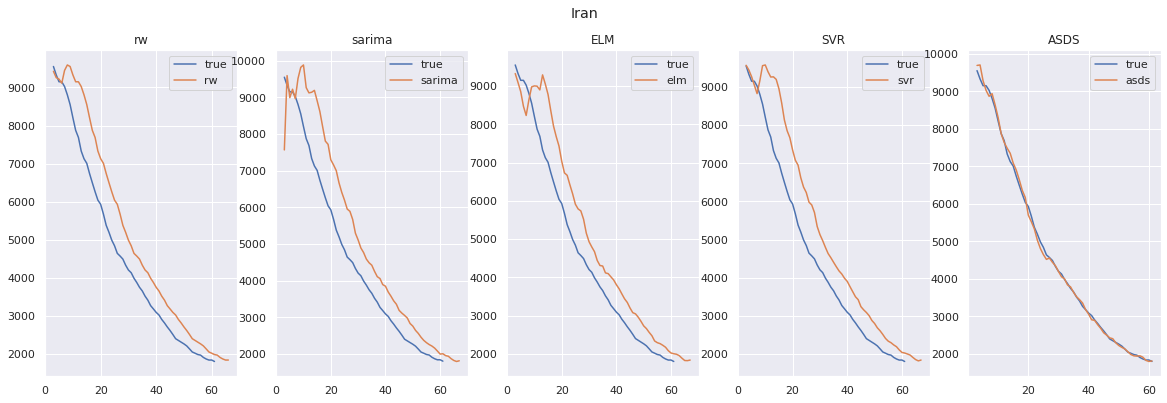

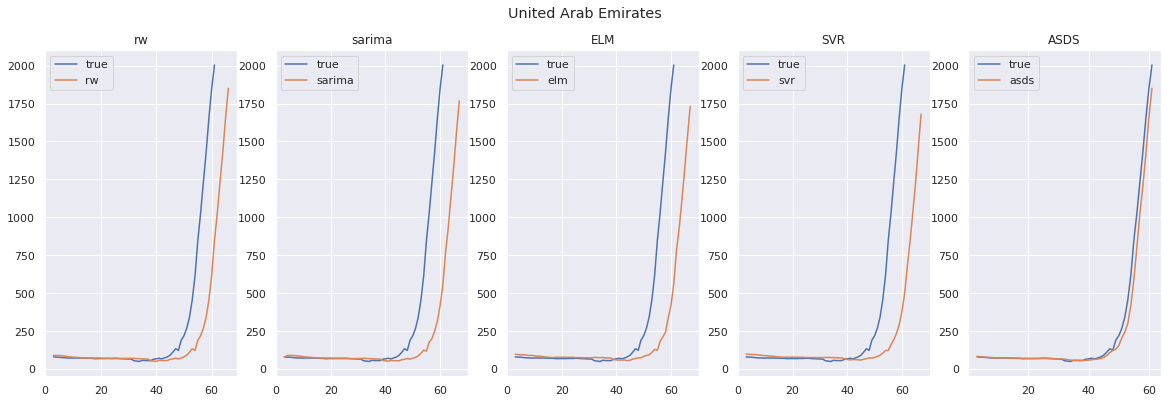

In [ ]:
for pred, true in zip(predictions.items(), data.values()):
    country = pred[0]
    pred = pred[1]
    fig, axs = plt.subplots(1,5, figsize=(20,6))
    axs[0].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['rw'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'rw'])
    axs[0].set_title('rw')
    axs[0].legend()
    axs[1].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['sarima'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'sarima'])
    axs[1].set_title('sarima')
    axs[1].legend()
    axs[2].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['elm'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'elm'])
    axs[2].set_title('ELM')
    axs[2].legend()
    axs[3].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['svm'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'svr'])
    axs[3].set_title('SVR')
    axs[3].legend()
    axs[4].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['ASDS'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'asds'])
    axs[4].set_title('ASDS')
    plt.legend()    
    fig.suptitle(country)
    

                  Diff
2021-10-22         NaN
2021-10-23         NaN
2021-10-24         NaN
2021-10-25         NaN
2021-10-26         NaN
...                ...
2021-12-27  349.511786
2021-12-28  446.263452
2021-12-29  147.143656
2021-12-30  200.823046
2021-12-31   59.423593

[71 rows x 1 columns]
                   Diff
2021-10-22          NaN
2021-10-23          NaN
2021-10-24          NaN
2021-10-25          NaN
2021-10-26          NaN
...                 ...
2021-12-27   233.304264
2021-12-28  1717.859190
2021-12-29   543.255553
2021-12-30   724.369278
2021-12-31   717.955474

[71 rows x 1 columns]
                    Diff
2021-10-22           NaN
2021-10-23           NaN
2021-10-24           NaN
2021-10-25           NaN
2021-10-26           NaN
...                  ...
2021-12-27   1511.808626
2021-12-28   8902.944962
2021-12-29  10889.103207
2021-12-30   6791.552252
2021-12-31   3793.727514

[71 rows x 1 columns]
                    Diff
2021-10-22           NaN
2021-10-23       

/tmp/ipykernel_46568/3191581237.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize=(10,6))


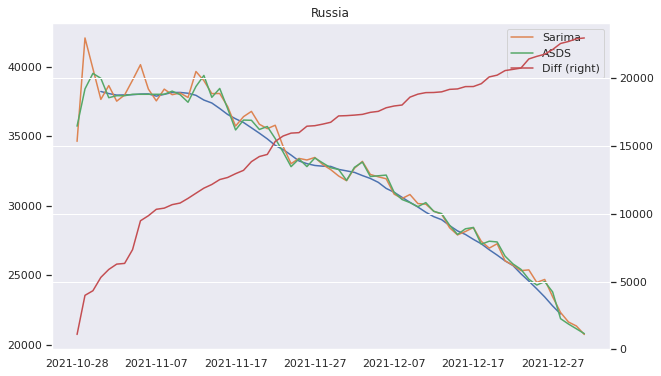

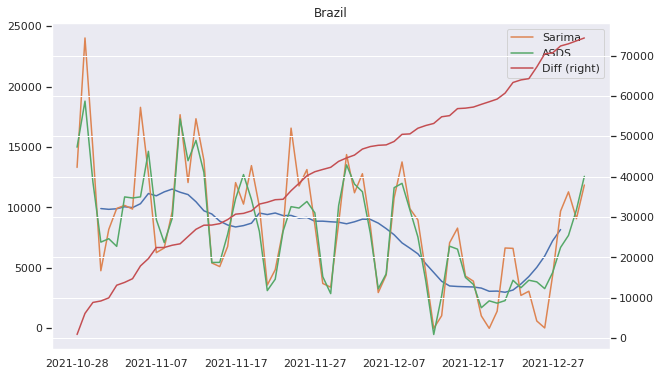

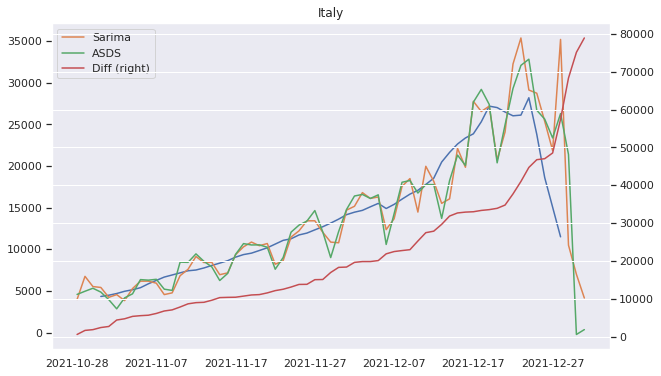

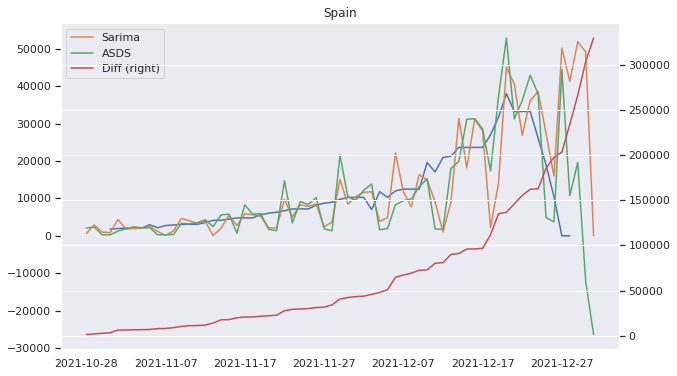

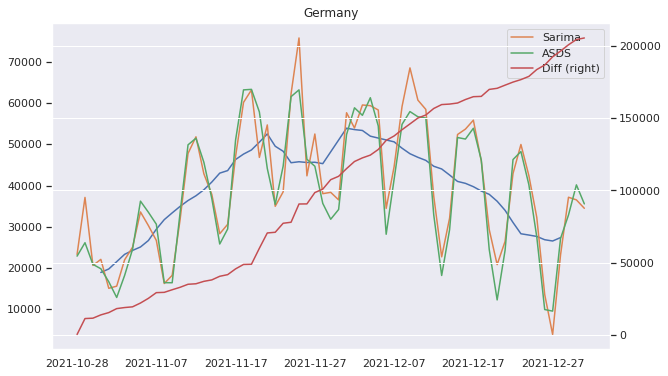

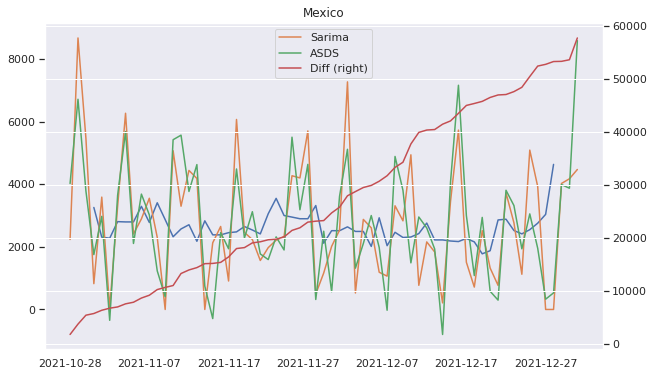

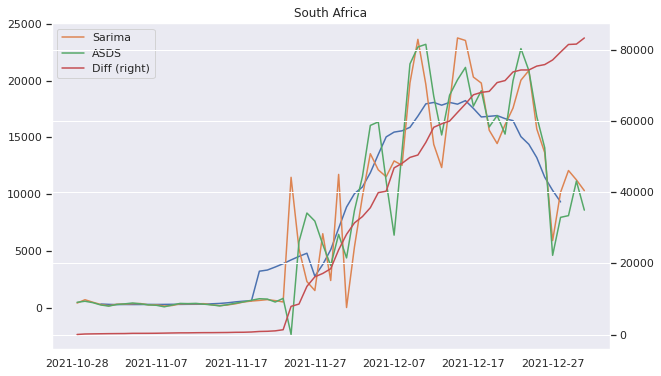

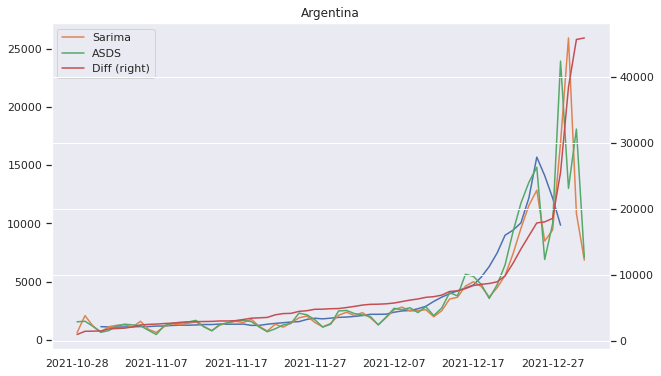

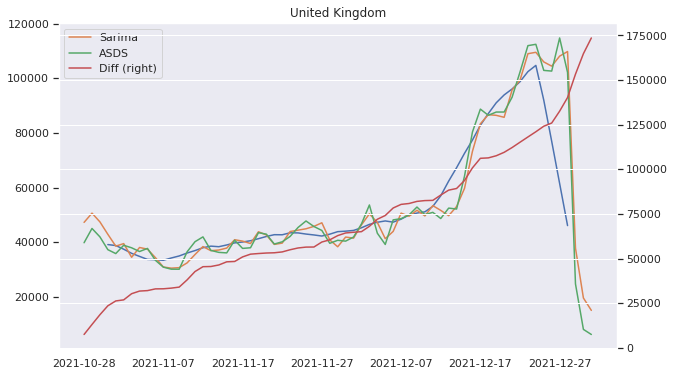

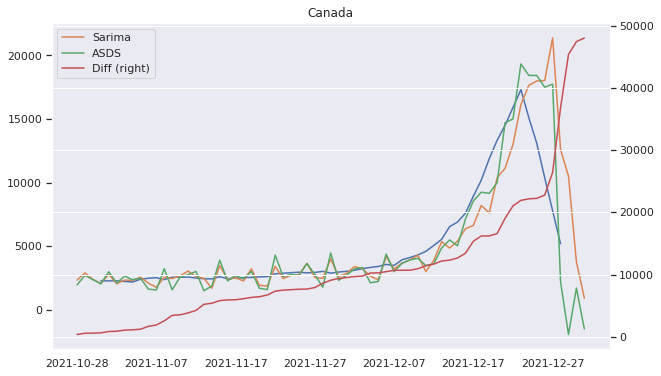

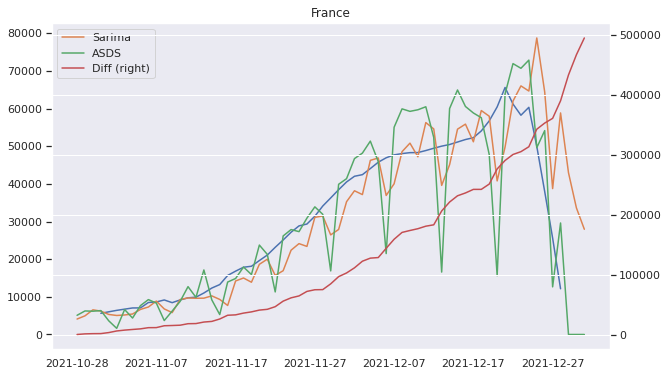

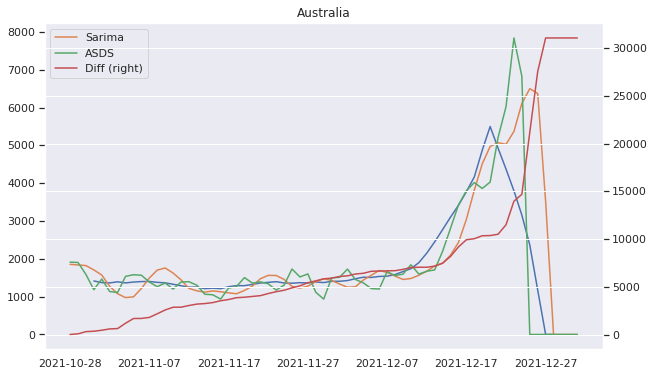

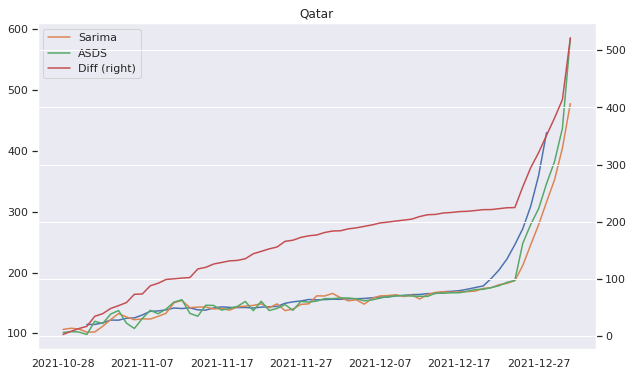

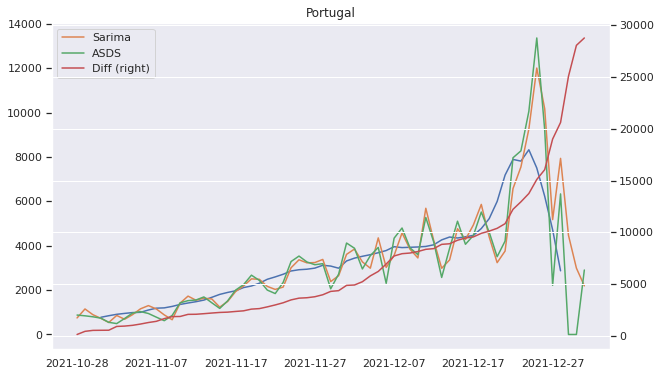

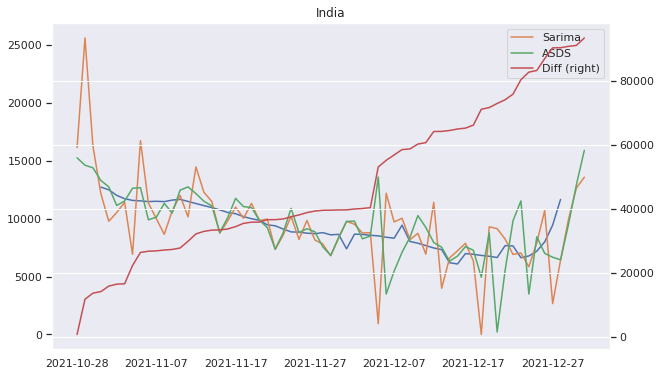

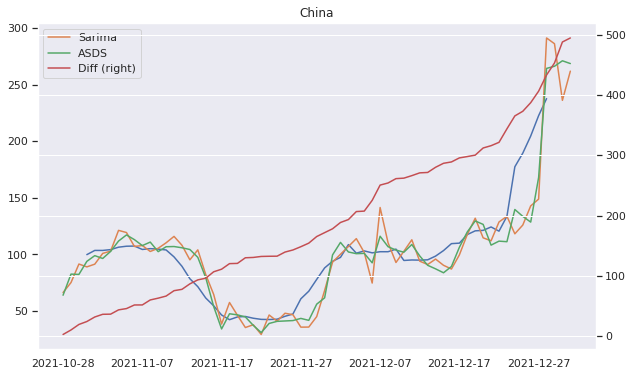

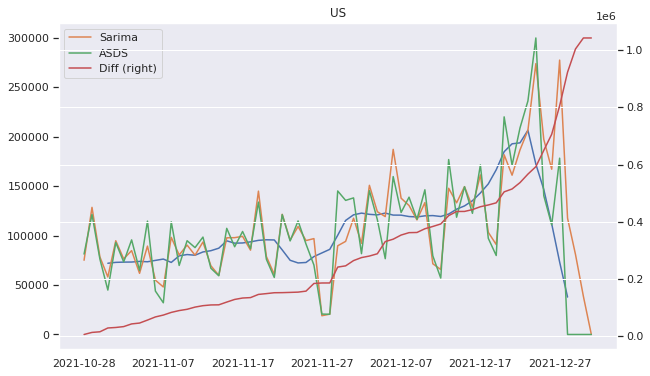

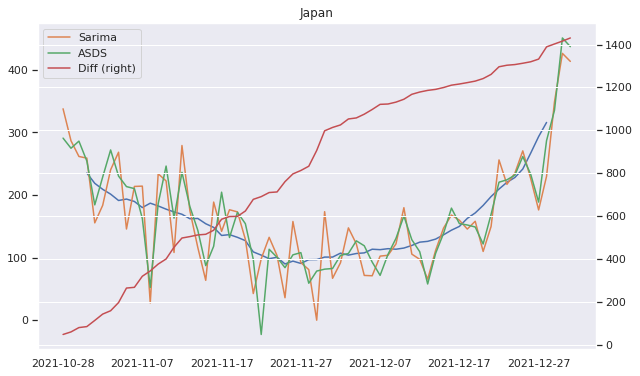

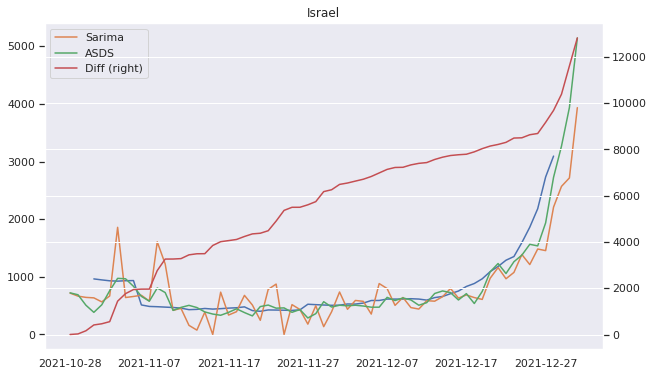

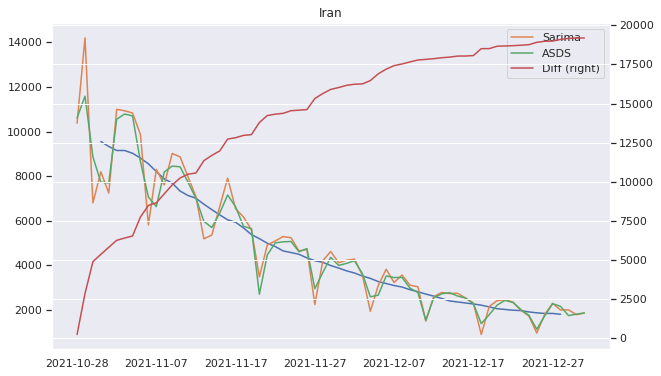

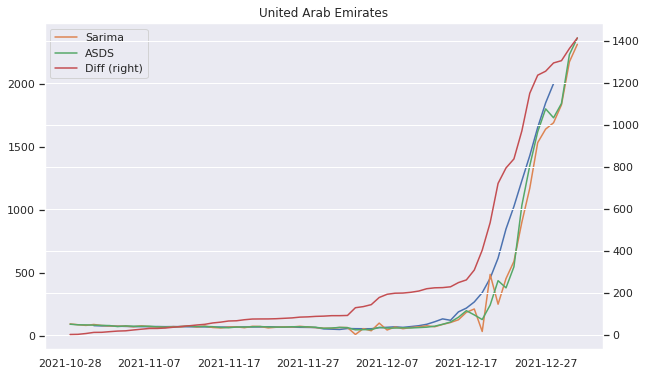

In [ ]:
for pred, true in zip(predictions.items(), data.values()):
    country = pred[0]
    pred = pred[1]
    fig, axs = plt.subplots(figsize=(10,6))
    true['test_data'].index = pred['sarima'].index
    pred['sarima'] = pred['sarima'].rename({'predicted_mean': country}, axis=1)
    pred['ASDS'] = pred['ASDS'].rename({'0': country}, axis=1)
    
    #print(true['test_data'])
    sqerror_sarima = (pred['sarima']).sub(true['test_data'], axis=1).abs()
    sqerror_asds = (pred['ASDS']).sub(true['test_data'], axis=1).abs()
    sqerror_diff = sqerror_sarima.rsub(sqerror_asds, axis=1).abs().rename({country: 'Diff Error'}, axis=1)
    sqerror_sarima = sqerror_sarima.rename({country: 'Sarima_error'}, axis=1)
    sqerror_asds = sqerror_asds.rename({country: 'ASDS_error'}, axis=1)
    print(sqerror_diff)

    # print(sqerror_sarima)
    # print(sqerror_asds)
    #axs.plot(tsa.seasonal_decompose(true['test_data'].iloc[-65:], period=7).trend)
    # axs.plot()
    # axs.plot(sqerror)
    tsa.seasonal_decompose(true['test_data'].iloc[-65:], period=7).trend.plot(ax=axs, title=country)
    #axs.right_ax.set_ylabel("Trend")
    pred['sarima'].iloc[-65:].rename({country: 'Sarima'}, axis=1).plot(ax=axs, label='sarima')
    pred['ASDS'].iloc[-65:].rename({country: 'ASDS'}, axis=1).plot(ax=axs, label='asds')
    #sqerror_sarima.iloc[-65:].cumsum().plot(ax=axs, secondary_y=True, ylabel="Cum. Error", mark_right=False)
    #sqerror_asds.iloc[-65:].cumsum().plot(ax=axs, secondary_y=True, ylabel="Cum. Error", mark_right=False)
    sqerror_diff.iloc[-65:].cumsum().plot(ax=axs, secondary_y=True, mark_right=False)
    #plt.legend(['trend', 'sarima', 'ASDS'])
    #axs.plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend])
    #axs.set_title('rw')   

<AxesSubplot:>

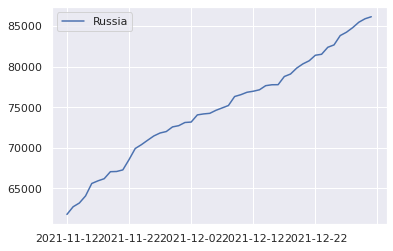

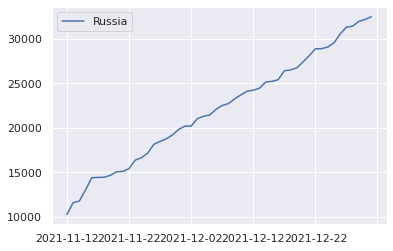

In [ ]:
(sqerror_sarima).abs().cumsum().iloc[-50:].plot()
(sqerror_asds).abs().cumsum().iloc[-50:].plot()

In [ ]:
for pred, true in zip(predictions.items(), data.values()):
    country = pred[0]
    pred = pred[1]
    fig, axs = plt.subplots(1,5, figsize=(20,6))
    axs[0].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['rw'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'rw'])
    axs[0].set_title('rw')
    axs[0].legend()
    axs[1].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['sarima'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'sarima'])
    axs[1].set_title('sarima')
    axs[1].legend()
    axs[2].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['elm'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'elm'])
    axs[2].set_title('ELM')
    axs[2].legend()
    axs[3].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['svm'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'svr'])
    axs[3].set_title('SVR')
    axs[3].legend()
    axs[4].plot(pd.concat([tsa.seasonal_decompose(true['test_data'].iloc[-65:].reset_index(drop=True), period=7).trend, tsa.seasonal_decompose(pred['ASDS'].reset_index(drop=True), period=7).trend], axis=1), label=['true', 'asds'])
    axs[4].set_title('ASDS')
    plt.legend()    
    fig.suptitle(country)
    

# Benchmarking

In [ ]:
bench = ['rw', 'arima', 'sarima', 'svm', 'elm', 'lstm', 'ASDS', 'AEDS4']

In [ ]:
test

0      932.0
1      501.0
2      684.0
3      961.0
4      857.0
       ...  
66    3046.0
67    2995.0
68    3446.0
69    5600.0
70    3886.0
Name: Israel, Length: 71, dtype: float64

In [ ]:
metrics = {}
for country in countries:
    metrics[country] = {}
    for model in bench:
        metrics[country][model] = {}
        test = data[country]['test_data'][country].iloc[-60:]
        pred = predictions[country][model].iloc[-60:]
        metrics[country][model]['RMSE'] = mean_squared_error(test, pred)
        metrics[country][model]['MAE'] = mean_absolute_error(test, pred)
        metrics[country][model]['MAPE'] = mape(test, pred)
        metrics[country][model]['R2'] = r2_score(test, pred)

In [ ]:
RMSE = pd.DataFrame(metrics).applymap(lambda x: x['RMSE'])
MAE = pd.DataFrame(metrics).applymap(lambda x: x['MAE'])
MAPE = pd.DataFrame(metrics).applymap(lambda x: x['MAPE'])
R2 = pd.DataFrame(metrics).applymap(lambda x: x['R2'])


In [ ]:
#MAPE = MAPE[pd.Index(selected_countries)]
MAPE['MEDIAN'] = MAPE.median(axis=1)

In [ ]:
MAPE.round(2)

Russia  Brazil  Italy  Spain  Germany  Mexico  South Africa  \
rw        0.02    0.36   0.20   0.56     0.30    0.90          0.56   
arima     0.02    0.31   0.14   0.34     0.14    0.56          0.48   
sarima    0.02    0.33   0.14   0.29     0.16    0.64          0.46   
svm       0.02    0.34   0.14   0.37     1.00    0.78          0.53   
elm       0.02    0.45   0.14   0.36     0.20    0.60          0.55   
lstm      0.74    0.87   0.97   2.73     0.53    4.02         13.58   
ASDS      0.01    0.23   0.11   0.28     0.12    0.61          0.38   
AEDS4     0.02    0.51   0.20   0.57     0.25    0.82          0.80   

        Argentina  United Kingdom  Canada  ...  Qatar  Portugal  India  China  \
rw           0.32            0.09    0.35  ...   0.08      0.33   0.20   0.28   
arima        0.20            0.08    0.29  ...   0.08      0.22   0.22   0.29   
sarima       0.21            0.08    0.18  ...   0.08      0.23   0.21   0.24   
svm          0.20            0.09    0.18  ...   0.08      0.21   0.15   0.23   
elm          0.29            0.10    0.25  ...   0.08      0.27   0.19   0.30   
lstm         8.96            0.19    1.03  ...   4.40      2.27  20.05  17.87   
ASDS         0.17            0.06    0.15  ...   0.06      0.18   0.16   0.22   
AEDS4        0.26            0.11    0.32  ...   0.14      0.31   0.27   0.44   

          US  Japan  Israel  Iran  United Arab Emirates  MEDIAN  
rw      0.56   0.31    0.35  0.17                  0.19    0.31  
arima   0.36   0.28    0.40  0.11                  0.19    0.22  
sarima  0.30   0.26    0.41  0.08                  0.18    0.21  
svm     0.38   0.25    0.47  0.11                  0.18    0.21  
elm     0.43   0.25    0.45  0.18                  0.20    0.25  
lstm    0.47   7.49    7.61  3.01                 18.47    2.73  
ASDS    0.23   0.17    0.25  0.07                  0.13    0.17  
AEDS4   0.49   0.27    0.42  0.20                  0.23    0.27  

[8 rows x 22 columns]

In [ ]:
MAPE.T.style.highlight_min(axis=1,
                           props='bfseries: ;').format('{:.3f}').to_latex('metrics_MAPE2',  caption='MAPE metrics', hrules=True, label='MAPE_metrics', position='H', position_float="centering")

In [ ]:
RMSE_RANK = RMSE.rank(ascending=True)
MAE_RANK = MAE.rank(ascending=True)
MAPE_RANK = MAPE.rank(ascending=True)
R2_RANK = R2.rank()

In [ ]:
MAPE_RANK.median(axis=1)

rw        6.0
arima     3.0
sarima    3.0
svm       3.5
elm       5.0
lstm      8.0
ASDS      1.0
AEDS4     6.5
dtype: float64

In [ ]:
MAPE_JOIN.rename(countries_labels, axis=1)

NameError: name 'MAPE_JOIN' is not defined

In [ ]:
MAPE_JOIN = pd.DataFrame()
merge = lambda s1, s2: '{:.1f} ({})'.format(s1*100, s2) 
for v in zip(MAPE.items(),MAPE_RANK.items()):
    tmp = v[0][1].combine(v[1][1], merge)
    MAPE_JOIN[v[0][0]] = tmp
    #MAPE_JOIN[v[0][0]] = v[1][1]
    #print(v[0])
    #print(v[1])
MAPE_JOIN.sort_index(axis=1, inplace=True)
MAPE_JOIN['MEDIAN'] = MAPE_RANK.median(axis=1)
#MAPE_JOIN = MAPE_JOIN.rename(countries_labels, axis=1)
MAPE_JOIN.T.style.to_latex('metrics_MAPE',  caption='MAPE metrics', hrules=True, label='MAPE_metrics', position='H', position_float="centering")


In [ ]:
RMSE_JOIN = pd.DataFrame()
merge = lambda s1, s2: '{:,.0f} ({})'.format(s1, s2) 
for v in zip(RMSE.items(),RMSE_RANK.items()):
    #tmp = v[0][1].combine(v[1][1], merge)
    RMSE_JOIN[v[0][0]] = v[1][1]
    #print(v[0])
    #print(v[1])
RMSE_JOIN.sort_index(axis=1, inplace=True)
RMSE_JOIN['MEDIAN'] = RMSE_RANK.median(axis=1)
RMSE_JOIN.style.format('{:.0f}').to_latex('metrics_rmse',  caption='rmse metrics', hrules=True, label='rmse_metrics', position='h', position_float="centering")


In [ ]:
RMSE_JOIN = pd.DataFrame()
merge = lambda s1, s2: '{:,.0f} ({})'.format(s1, s2) 
for v in zip(RMSE.items(),RMSE_RANK.items()):
    tmp = v[0][1].combine(v[1][1], merge)
    RMSE_JOIN[v[0][0]] = tmp
    #print(v[0])
    #print(v[1])
RMSE_JOIN.sort_index(axis=1, inplace=True)
RMSE_JOIN['MEDIAN'] = RMSE_RANK.median(axis=1)
RMSE_JOIN.T.style.to_latex('metrics_rmse',  caption='rmse metrics', hrules=True, label='rmse_metrics', position='h', position_float="centering")